# NGC 4258 (UGC 7353)

Галактика найдена из пересечения HYPERLEDA и https://arxiv.org/pdf/1608.06735v1.pdf.

In [1]:
from IPython.display import HTML
from IPython.display import Image
import os

%pylab
%matplotlib inline
%run ../../utils/load_notebook.py

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
from photometry import *

importing Jupyter notebook from photometry.ipynb
Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
from instabilities import *

importing Jupyter notebook from instabilities.ipynb
Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [4]:
from utils import *

importing Jupyter notebook from utils.ipynb


In [5]:
name = 'N4258'
gtype = 'SABb' #LEDA, 'SBbc' from Heraudeau98
incl = 68.3  #LEDA
scale = 0.043 #kpc/arcsec according to NED

data_path = '../../data/n4258_u7353'
sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)

In [6]:
%%javascript 
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h2 id="tocheading">Оглавление</h2>
<div id="toc"></div>

## Статьи

TODO: add arcticles

## Разное

In [7]:
os.chdir(data_path)

# Данные из NED
HTML('<iframe src=http://ned.ipac.caltech.edu/cgi-bin/objsearch?objname=ngc+4258&extend=no&hconst=\
73&omegam=0.27&omegav=0.73&corr_z=1&out_csys=Equatorial&out_equinox=J2000.0&obj_sort=RA+or+Longitude&of=pre_text&zv_breaker=\
30000.0&list_limit=5&img_stamp=YES width=1000 height=350></iframe>')

In [8]:
# Данные из HYPERLEDA
HTML('<iframe src=http://leda.univ-lyon1.fr/ledacat.cgi?o=ngc4258 width=1000 height=350></iframe>')

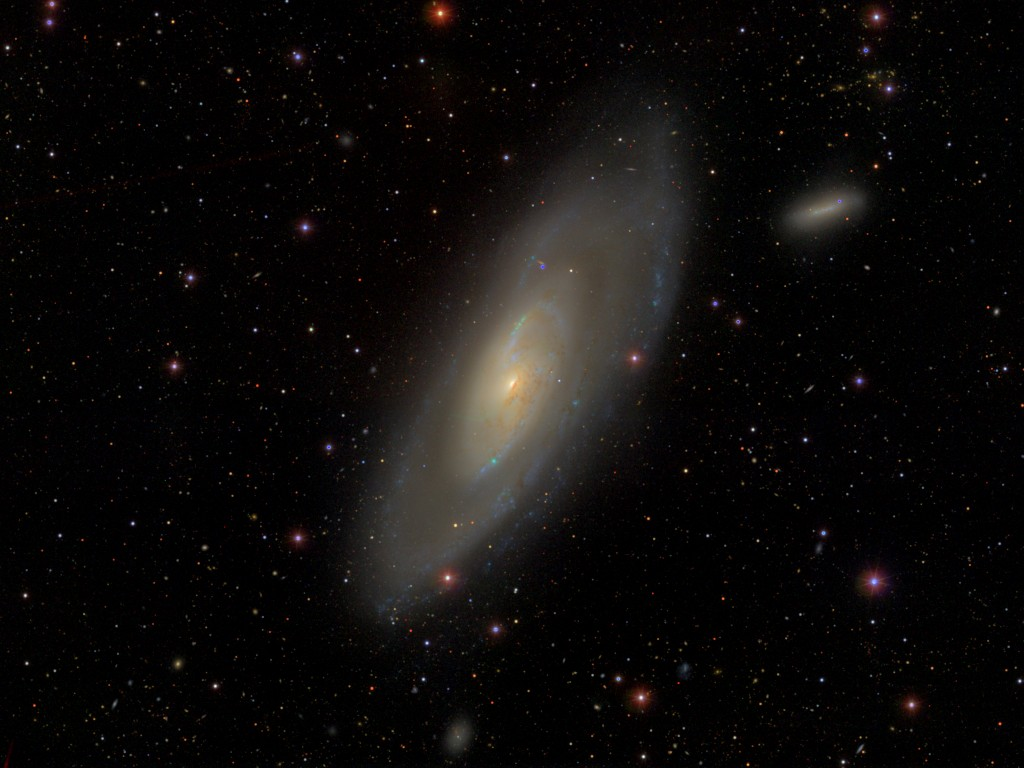

In [9]:
#SDSS
Image('n4258_SDSS.jpg', width=300)

Из выборки http://cosmo.nyu.edu/hogg/rc3/ с маштабом:

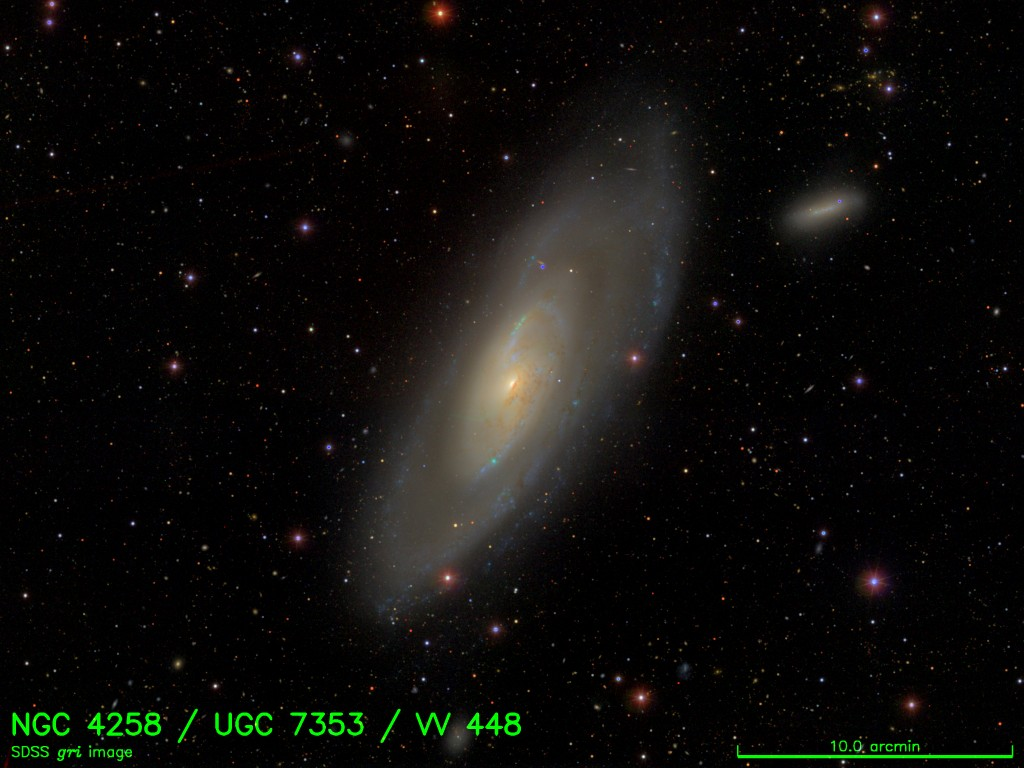

In [10]:
Image('n4258_SDSS_labeled.jpg', width=500)

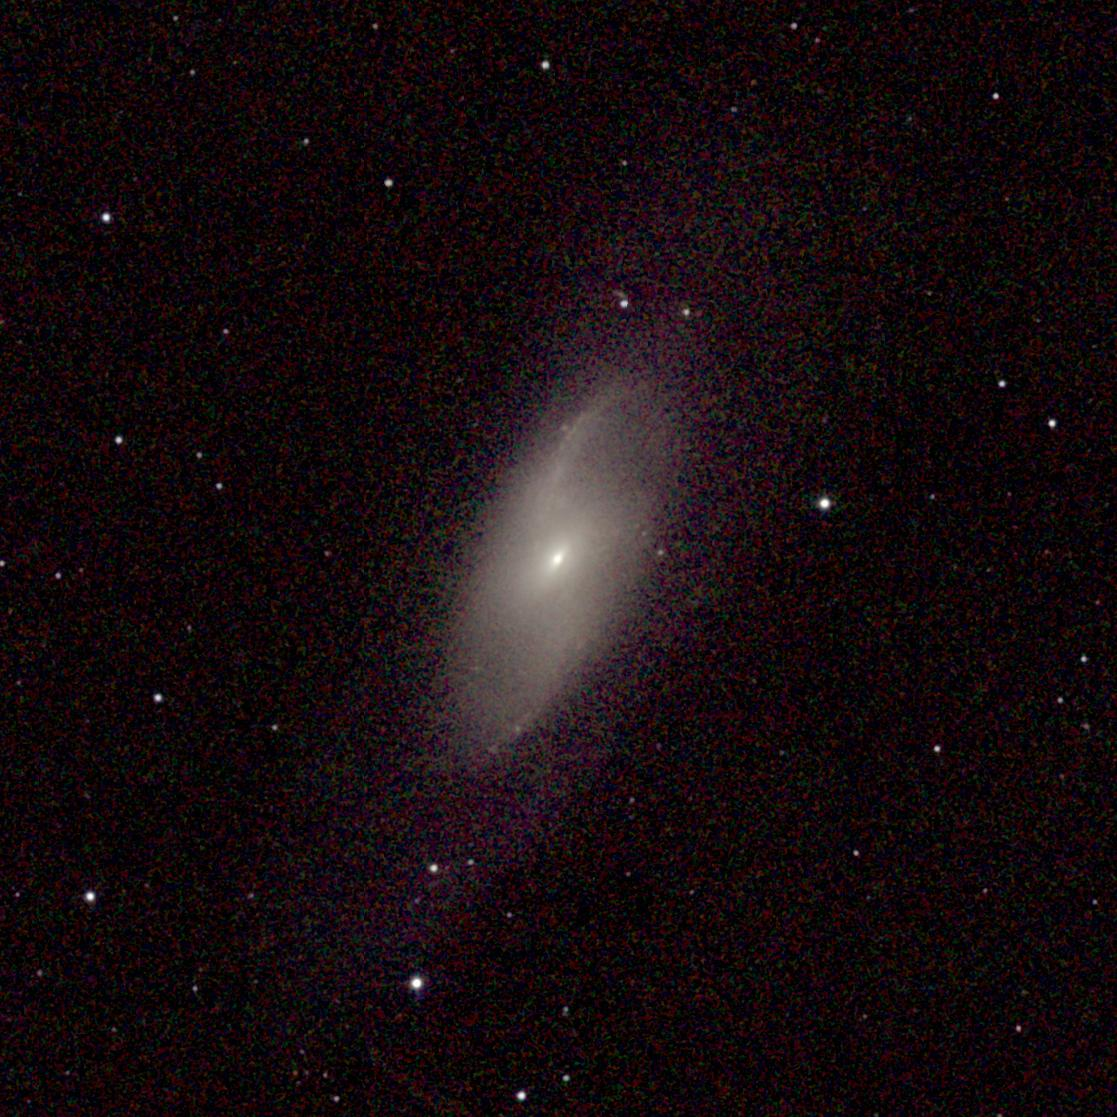

In [11]:
#JHK
Image('n4258_2MASS.jpg', width=300)

Также есть целых три фотографии со SPITZER+Chandra с невидимыми спиралями:
- http://www.spitzer.caltech.edu/images/1764-ssc2007-06a-Anomalous-Arms-Spiral-Galaxy-M106
- http://www.spitzer.caltech.edu/images/5910-sig14-020a-Black-Hole-Jets-Make-Shock-Waves
- http://www.spitzer.caltech.edu/images/5907-sig14-020-Galactic-Pyrotechnics-on-Display

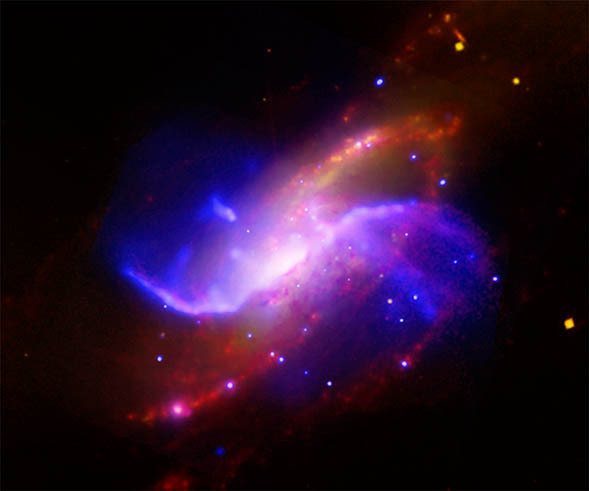

In [16]:
Image('http://www.spitzer.caltech.edu/uploaded_files/graphics/high_definition_graphics/0008/2016/ssc2007-06a_Ti.jpg', width=300)

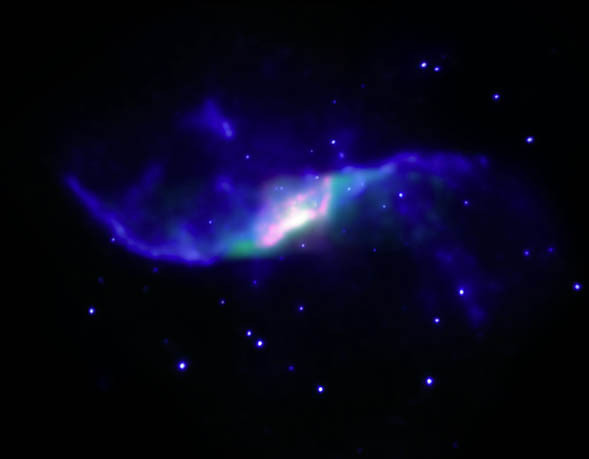

In [15]:
Image('http://www.spitzer.caltech.edu/uploaded_files/graphics/high_definition_graphics/0010/1167/sig14-020a_Inline.jpg', width=300)

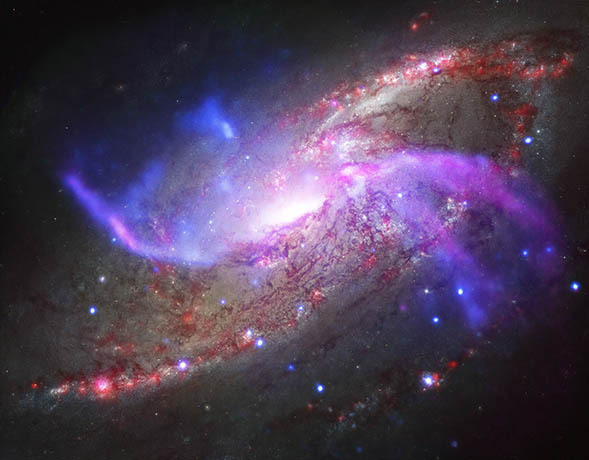

In [14]:
Image('http://www.spitzer.caltech.edu/uploaded_files/graphics/high_definition_graphics/0010/1185/sig14-020_Inline.jpg', width=300)

## Кинематические данные по звездам

Дисперсии скоростей и кривая вращения - есть в Heraudeau 1998 http://adsabs.harvard.edu/cgi-bin/bib_query?1998A%26AS..133..317H до ~ 50'' (1 разрез), PA=$150^{\circ}$

#TODO: понять, исправлено ли за наклон

### Кривая вращения

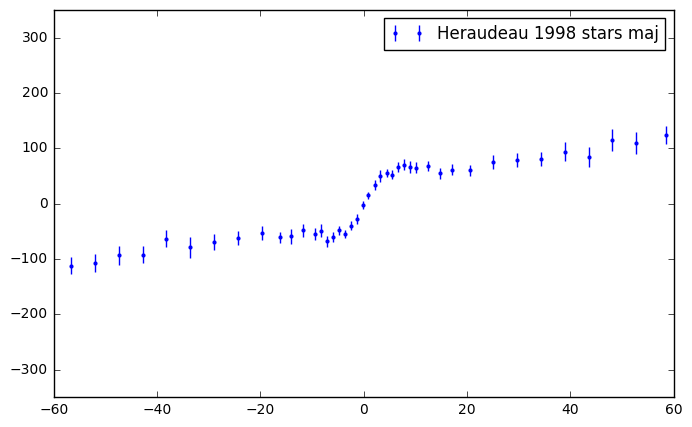

In [12]:
# Данные по звездной кинематике Heraudeau+1998 вдоль большой полуоси (не исправленные за наклон?) - из HYPERLEDA
r_ma, vel_ma, e_vel_ma, sig_ma, e_sig_ma = zip(*np.loadtxt("her98_kinem.dat", float))

fig = plt.figure(figsize=[8,5])
plt.errorbar(r_ma, vel_ma, e_vel_ma, fmt='.', marker='.', mew=0, label="Heraudeau 1998 stars maj")
plt.legend()
plt.ylim(-350., 350.)
plt.show()

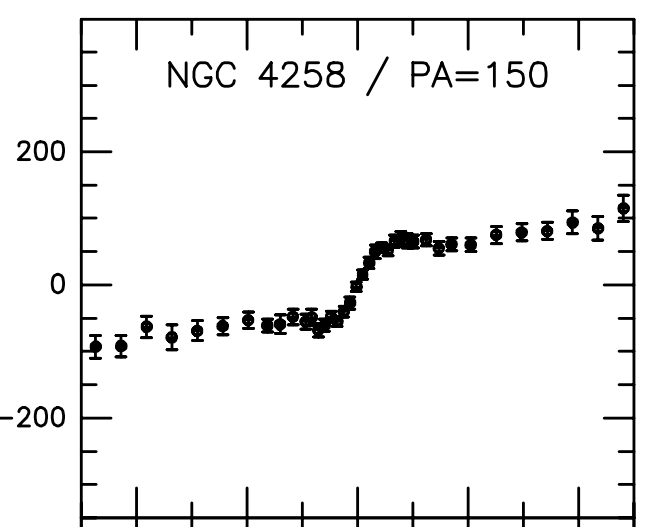

In [13]:
Image('her98_rot.png') #оригинал

Приближение:

In [14]:
r_ma_b, vel_ma_b, e_vel_b = zip(*sorted(zip(np.abs(r_ma), np.abs(vel_ma), e_vel_ma)))

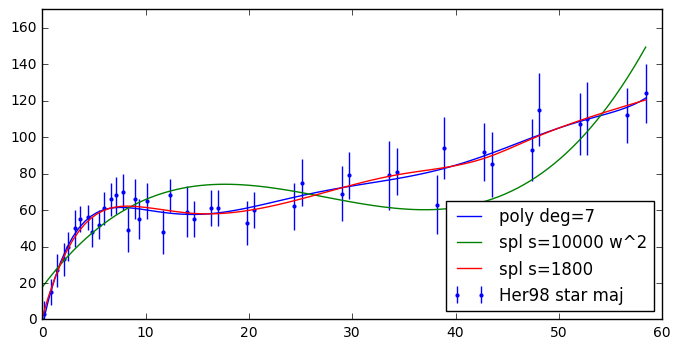

In [15]:
# %%time
fig = plt.figure(figsize=[8,4])
plt.errorbar(r_ma_b, vel_ma_b, yerr=e_vel_b, fmt='.', marker='.', mew=0, color='blue', label = 'Her98 star maj')

test_points = np.linspace(0.0, max(r_ma_b), 100)

poly_star = poly1d(polyfit(r_ma_b, vel_ma_b, deg=7))
plt.plot(test_points, poly_star(test_points), '-', label='poly deg=7')

def w(arr):
    return map(lambda l: 1/(1. + l**2), arr)

import scipy.interpolate as inter

spl = inter.UnivariateSpline(r_ma_b, vel_ma_b, k=3, s=10000., w=w(e_vel_b))
plt.plot(test_points, spl(test_points), '-', label='spl s=10000 w^2')

spl = inter.UnivariateSpline(r_ma_b, vel_ma_b, k=3, s=1800.)
plt.plot(test_points, spl(test_points), '-', label='spl s=1800')

plt.legend(loc='lower right')
plt.ylim(0, 170)
plt.show()

C весами плохо получается, полином и обычный почти совпадают - берем их:

In [16]:
star_approx = spl

### Дисперсии

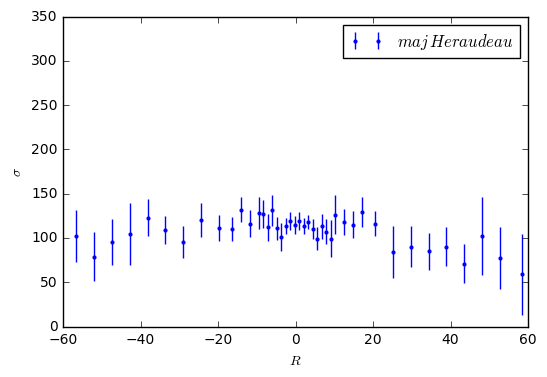

In [17]:
r_sig_ma = r_ma #Heraudeau+1998

fig = plt.figure(figsize=[6., 4.])
plt.errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='blue', label=r'$maj\, Heraudeau $')

plt.xlabel('$R$')
plt.ylabel('$\sigma$')
plt.ylim(0, 350)
plt.legend()
plt.show()

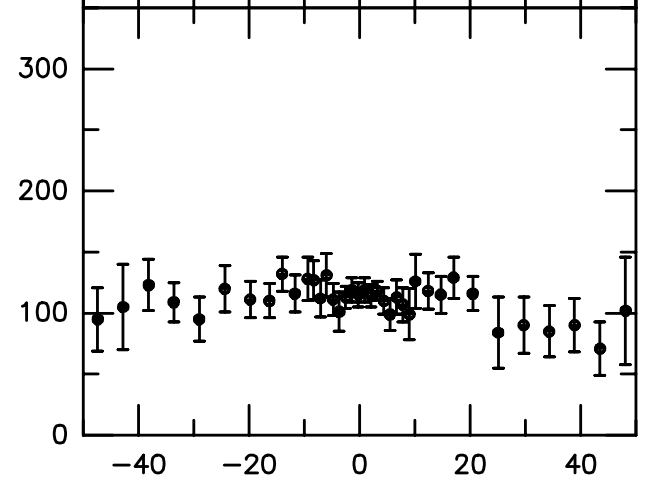

In [18]:
Image('her98_sig.png') #из статьи

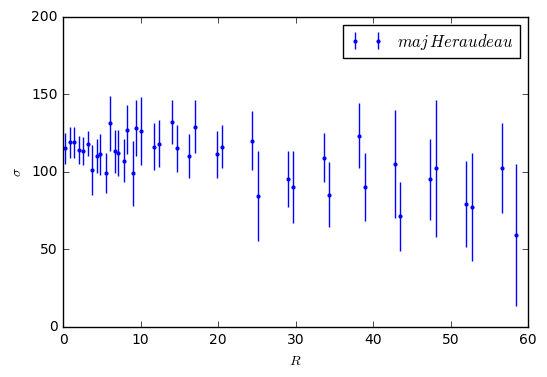

In [19]:
r_sig_ma = map(abs, r_sig_ma)

fig = plt.figure(figsize=[6., 4.])
plt.errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='blue', label=r'$maj\, Heraudeau $')
plt.xlabel('$R$')
plt.ylabel('$\sigma$')
plt.ylim(0, 200)
plt.legend()
plt.show()

Для большой оси: $\sigma^2_{maj} = \sigma^2_{\varphi}\sin^2 i + \sigma^2_{z}\cos^2 i$, следовательно примерные ограничения
$$\sigma_{maj}  < \frac{\sigma_{maj}}{\sqrt{\sin^2 i + 0.49\cos^2 i}}< \sigma_R = \frac{\sigma_{maj}}{\sqrt{f\sin^2 i + \alpha^2\cos^2 i}} ~< \frac{\sigma_{maj}}{\sqrt{0.5\sin^2 i + 0.09\cos^2 i}} < \frac{\sqrt{2}\sigma_{maj}}{\sin i} (или \frac{\sigma_{maj}}{\sqrt{f}\sin i}),$$ 
или можно более точную оценку дать, если построить $f$ (сейчас $0.5 < f < 1$).

Для малой оси: $\sigma^2_{min} = \sigma^2_{R}\sin^2 i + \sigma^2_{z}\cos^2 i$ и ограничения
$$\sigma_{min} < \frac{\sigma_{min}}{\sqrt{\sin^2 i + 0.49\cos^2 i}} < \sigma_R = \frac{\sigma_{min}}{\sqrt{\sin^2 i + \alpha^2\cos^2 i}} ~< \frac{\sigma_{min}}{\sqrt{\sin^2 i + 0.09\cos^2 i}} < \frac{\sigma_{min}}{\sin i}$$ 

Соответственно имеем 5 оценок из maj и 4 оценки из min.

У нас только большая - приближаем по ней.

In [20]:
spl_maj = inter.UnivariateSpline(r_sig_ma, sig_ma, k=3, s=10000.)
sig_maj_lim = max(r_sig_ma)

points = np.linspace(0.1, max(r_ma)+15., 100)

In [21]:
# TODO: find way to move to external file
@flat_end(sig_maj_lim)
def sig_R_maj_minmin(r, spl_maj=spl_maj):
    return spl_maj(r).item()

@flat_end(sig_maj_lim)
def sig_R_maj_min(r, spl_maj=spl_maj):
    return spl_maj(r).item()/sqrt(sin_i**2 + 0.49*cos_i**2)
    
@flat_end(sig_maj_lim)
def sig_R_maj_max(r, spl_maj=spl_maj):
    return spl_maj(r).item()/sqrt(0.5*sin_i**2 + 0.09*cos_i**2)

@flat_end(sig_maj_lim)
def sig_R_maj_maxmax(r, spl_maj=spl_maj):
    return spl_maj(r)*sqrt(2)/sin_i
    
@flat_end(sig_maj_lim)
def sig_R_maj_maxmaxtrue(r, spl_maj=spl_maj):
    return spl_maj(r)/sin_i/sqrt(sigPhi_to_sigR_real(r))

Используем соотношение $\sigma_{\varphi}^{2}/\sigma_{R}^{2}$, которое описывается уравнением ${\displaystyle \sigma_{\varphi}^{2}/\sigma_{R}^{2}=0.5\left(1+\frac{R}{\bar{v}_{\varphi}}\frac{d\bar{v}_{\varphi}}{dR}\right)}$ (Binney & Tremaine, 1987)

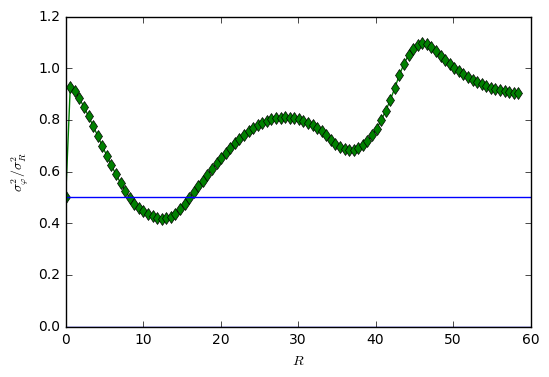

In [22]:
def sigPhi_to_sigR_real(R):
        return 0.5 * (1 + R*star_approx.derivative()(R) / star_approx(R))

plt.plot(test_points, [sigPhi_to_sigR_real(R) for R in test_points], 'd-', color='green')
plt.axhline(y=0.5)
plt.axhline(y=0.0)
plt.xlabel('$R$')
plt.ylabel(r"$\sigma_{\varphi}^2/\sigma_{R}^2$")
plt.ylim(0)
plt.show()

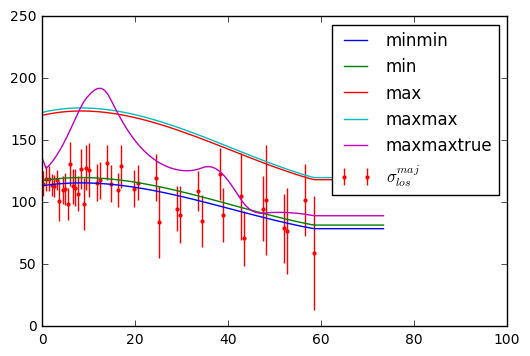

In [23]:
plt.errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{maj}$')
plt.plot(points, map(sig_R_maj_minmin, points), label = 'minmin')
plt.plot(points, map(sig_R_maj_min, points), label = 'min')
plt.plot(points, map(sig_R_maj_max, points), label = 'max')
plt.plot(points, map(sig_R_maj_maxmax, points), label = 'maxmax')
plt.plot(points, map(sig_R_maj_maxmaxtrue, points), label = 'maxmaxtrue')

plt.legend()
plt.ylim(0,250)
plt.xlim(0,100)
plt.show()

Видно, что оценки почти не отличаются, только "настоящая" близка и к одной и к другой.

## Данные по газу

### Кривая вращения

* есть по $\rm{CO}$ тут http://iopscience.iop.org/article/10.1086/511762/pdf
* есть по $\rm{HI}$ тут http://www.aanda.org/articles/aa/pdf/2011/06/aa16177-10.pdf
* по СO + HI http://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?1997PASJ...49...17S&amp;data_type=PDF_HIGH&amp;whole_paper=YES&amp;type=PRINTER&amp;filetype=.pdf

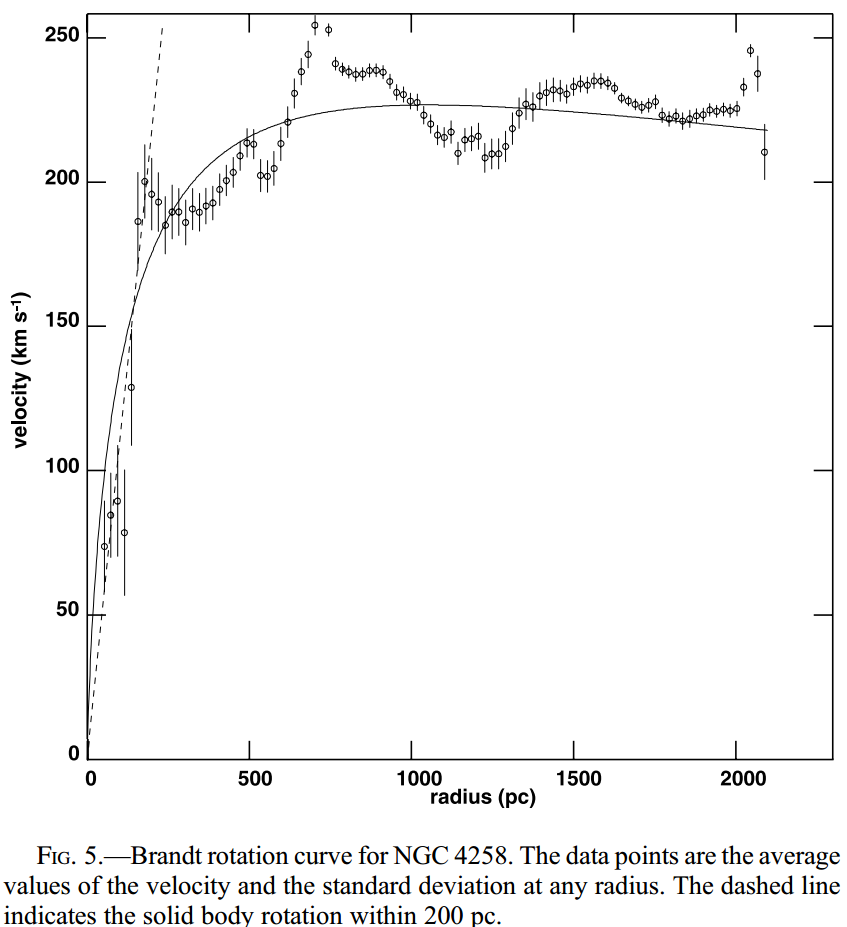

In [24]:
Image('CO_rot.png') #from Sawada-Satoh 2007, правда [P.A.] = 86 

(0, 2250.0)

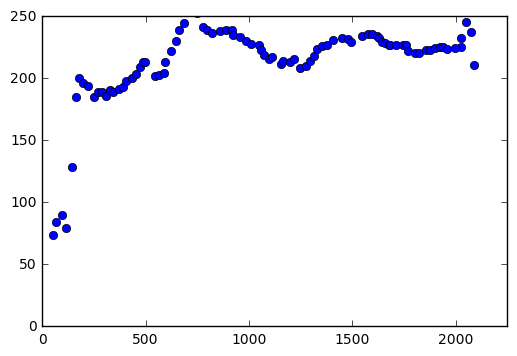

In [25]:
# Данные по кинематике газа Sawada-Satoh 2007 в CO
r_co, vel_co = zip(*np.loadtxt("CO_rot.dat", float, delimiter=','))
plt.plot(r_co, vel_co, 'o', label='CO Sawada-Satoh 2007')
plt.ylim(0, 250)
plt.xlim(0, 2250.)

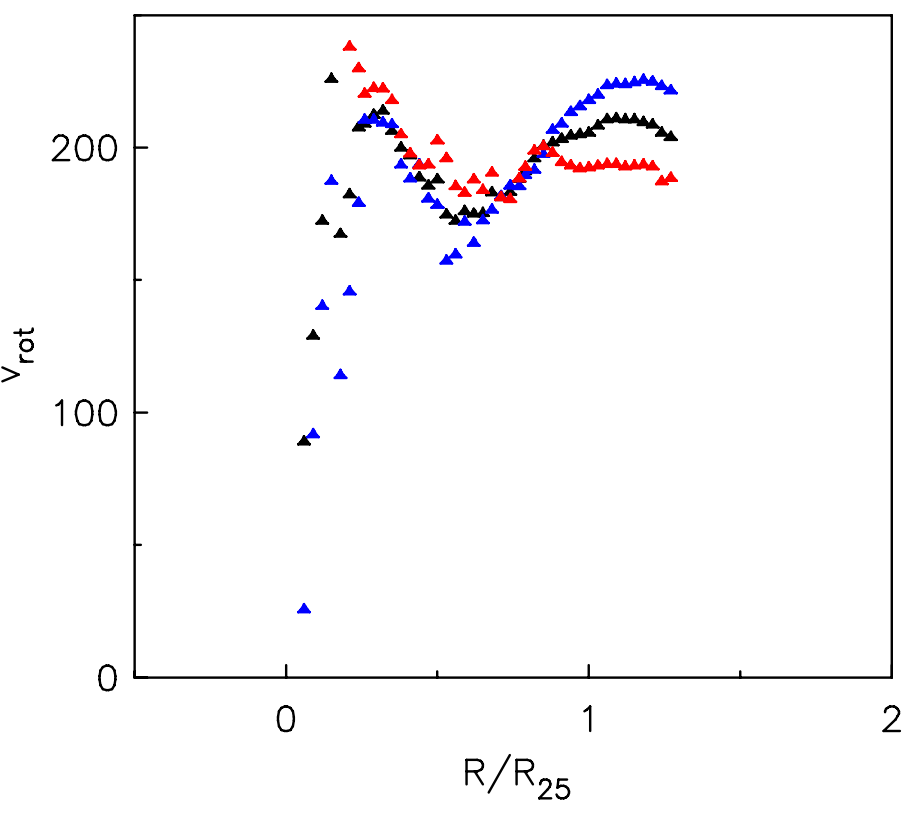

In [26]:
Image('HI_rot.png') #HI WHISP from van Eymeren 2011, PA=331(-180=151, все ок), R25=19.46kpc, разные цвета - это две стороны, черная - усредненная

(-0.5, 2.0)

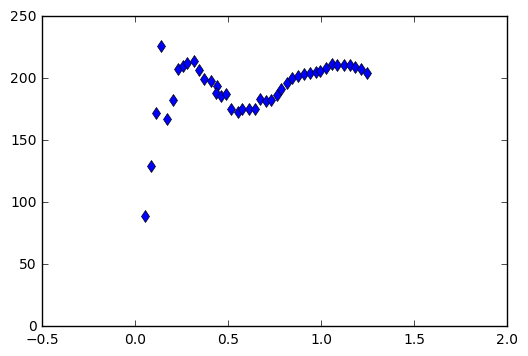

In [27]:
R25 = 19.46

# Данные по кинематике газа van Eymeren 2011 в HI
r_hi, vel_hi = zip(*np.loadtxt("HI_rot.dat", float, delimiter=','))
plt.plot(r_hi, vel_hi, 'd', label='HI Eymeren+2011')
plt.ylim(0, 250)
plt.xlim(-0.5, 2.)

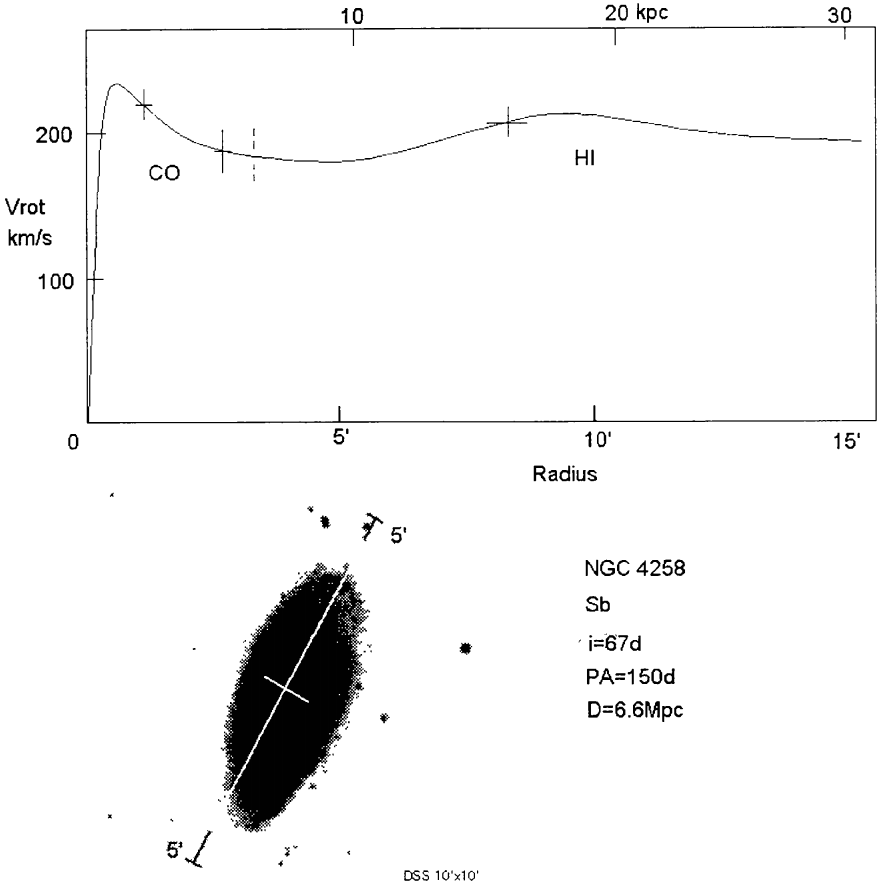

In [28]:
Image('CO_HI_rot.png') # CO+HI Sofue 97

Тут точки не самое ценное, видно как ось проходит зато.

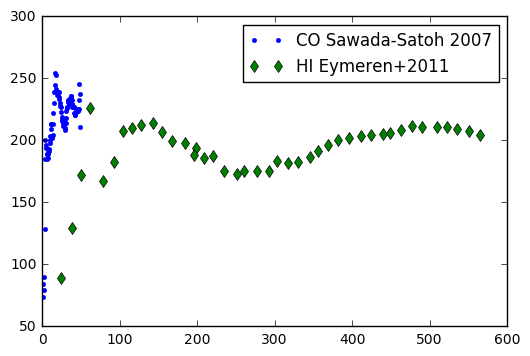

In [29]:
plt.plot([l/1000./scale for l in r_co], vel_co, '.', label='CO Sawada-Satoh 2007')
plt.plot([l*R25/scale for l in r_hi], vel_hi, 'd', label='HI Eymeren+2011')
plt.legend()

Непонятно, что брать. Видимо с учетом того, что у $CO$ странный позиц. угол - берем $HI$:

In [30]:
r_hi = [l*R25/scale for l in r_hi]
r_co = [l/1000./scale for l in r_co]

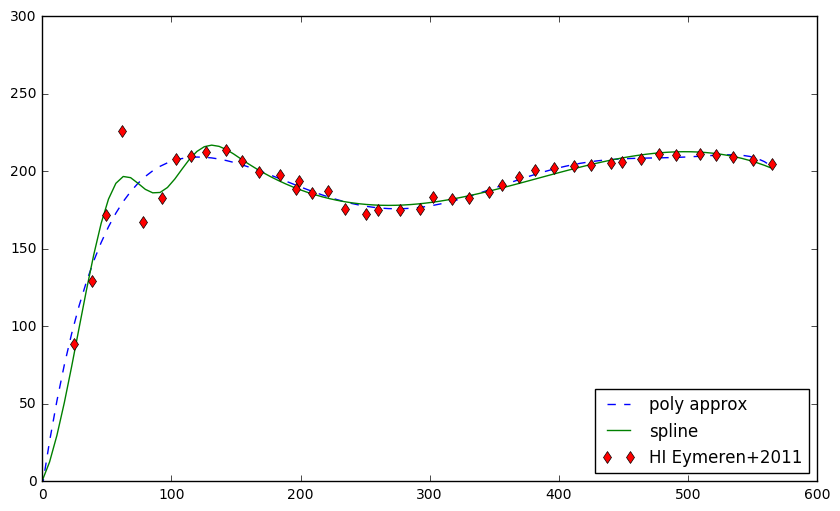

In [31]:
fig = plt.figure(figsize=[10,6])
_1,_2, = [0.0,],[0.0,]
_1.extend(r_hi)
_2.extend(vel_hi)
_1,_2 = zip(*sorted(zip(_1,_2)))

gas_approx = poly1d(polyfit(_1, _2, deg=9))
test_points = np.linspace(0, max(r_hi), 100)
plt.plot(test_points, gas_approx(test_points), '--', label='poly approx')

spl_gas = inter.UnivariateSpline(_1, _2, k=3, s=2000.)
plt.plot(test_points, spl_gas(test_points), '-', label='spline')

plt.plot(r_hi, vel_hi, 'd', label='HI Eymeren+2011')

plt.ylim(0, 300)
plt.legend(loc='lower right')
plt.show()

А вот такой результат для $CO$ + HI:

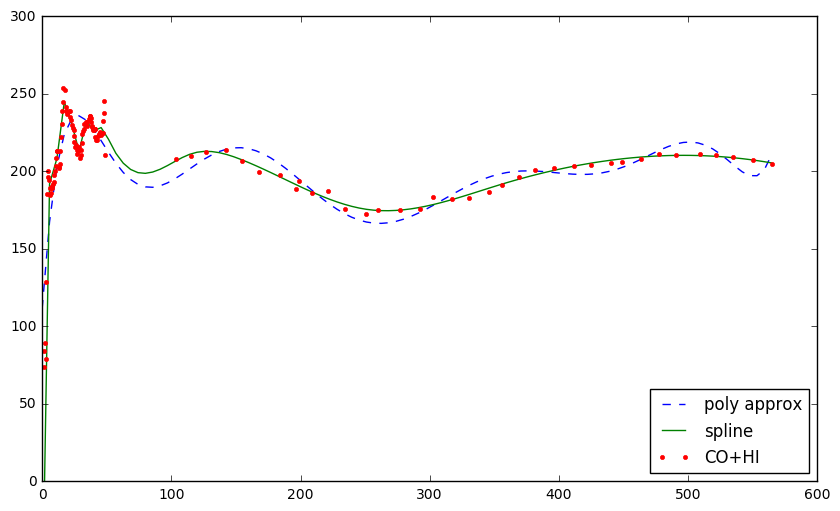

In [32]:
_1,_2 = zip(*filter(lambda l: l[0] > 100., zip(r_hi, vel_hi)))
_1 = list(r_co) + list(_1)
_2 = list(vel_co) + list(_2)

fig = plt.figure(figsize=[10,6])

gas_approx = poly1d(polyfit(_1, _2, deg=9))
test_points = np.linspace(0, max(r_hi), 100)
plt.plot(test_points, gas_approx(test_points), '--', label='poly approx')

spl_gas = inter.UnivariateSpline(_1, _2, k=3, s=2000.)
plt.plot(test_points, spl_gas(test_points), '-', label='spline')

# plt.plot(r_co, vel_co, 'd', label='CO')
plt.plot(_1, _2, '.', label='CO+HI')

plt.ylim(0, 300)
plt.legend(loc='lower right')
plt.show()

Так наверное гораздо более обоснованно (хотя про угол конечно же есть сомнения).

### Эпициклическая частота

Для случая бесконечного тонкого диска: $$\kappa=\frac{3}{R}\frac{d\Phi}{dR}+\frac{d^2\Phi}{dR^2}$$
где $\Phi$ - гравпотенциал, однако его знать не надо, т.к. есть проще формула: $$\kappa=\sqrt{2}\frac{\vartheta_c}{R}\sqrt{1+\frac{R}{\vartheta_c}\frac{d\vartheta_c}{dR}}$$

utils.ipynb:4: RuntimeWarning: divide by zero encountered in double_scalars
utils.ipynb:4: RuntimeWarning: invalid value encountered in sqrt
utils.ipynb:6: RuntimeWarning: divide by zero encountered in double_scalars


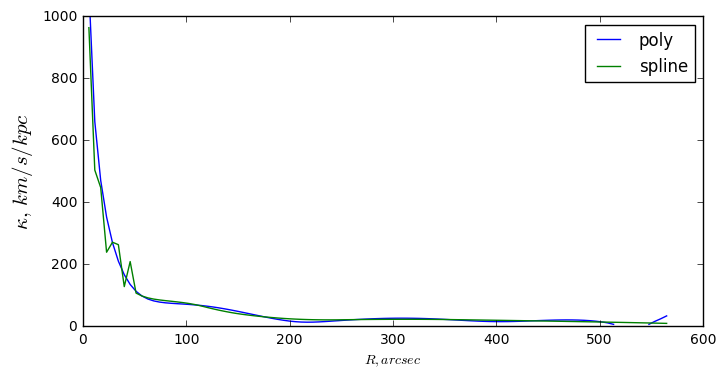

In [33]:
fig = plt.figure(figsize=[8, 4])
plt.plot(test_points, [epicyclicFreq_real(gas_approx, x, scale) for x in test_points], '-', label='poly')
plt.plot(test_points, [epicyclicFreq_real(spl_gas, x, scale) for x in test_points], '-', label='spline')
plt.xlabel('$R, arcsec$')
plt.ylabel('$\kappa,\, km/s/kpc$', fontsize=15)
plt.ylim(0, 1000)
plt.legend()
plt.show()

Достаточно сложно, учитывая что нас интересуют первые 50 секунд.

### Поверхностная плотность газа 

Данные $\Sigma_{HI}$ и $\Sigma_{H_2}$ https://arxiv.org/pdf/1608.06735v1.pdf

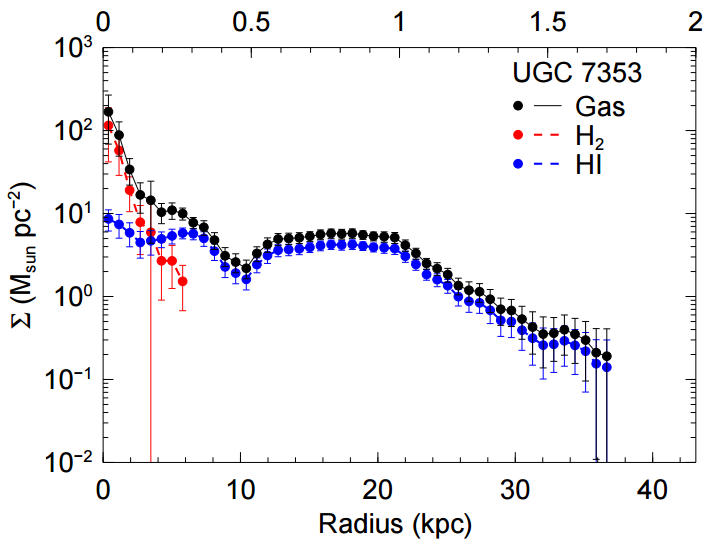

In [34]:
Image('u7353_gas_dens.png')

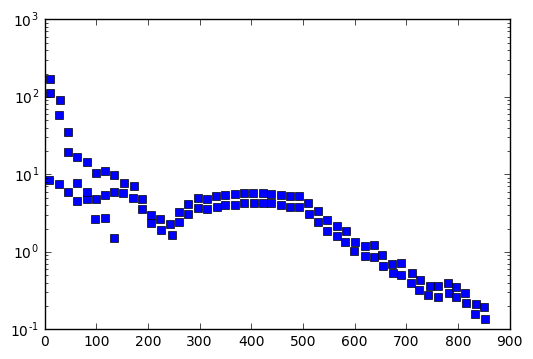

In [35]:
r_g_dens, gas_dens = zip(*np.loadtxt("gas_data.dat", float, delimiter=','))

plt.semilogy([l/scale for l in r_g_dens], gas_dens, 's')
plt.show()

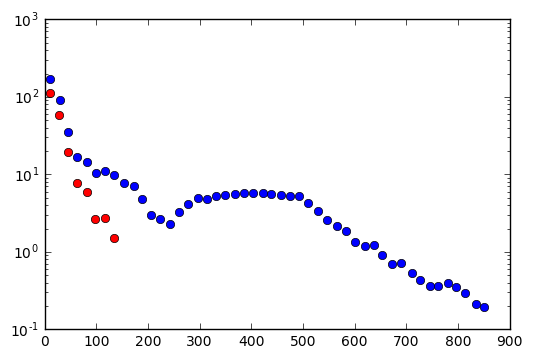

In [36]:
plt.semilogy([l/scale for l in r_g_dens[48:56]], gas_dens[48:56], 'o', color='r')
plt.semilogy([l/scale for l in r_g_dens[56:]], gas_dens[56:], 'o') #только сумма
plt.show()

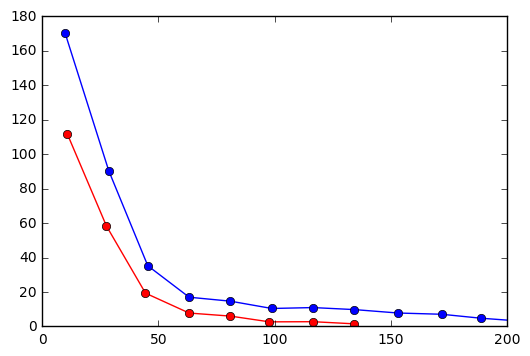

In [37]:
plt.plot([l/scale for l in r_g_dens[48:56]], gas_dens[48:56], '-o', color='r')
plt.plot([l/scale for l in r_g_dens[56:]], gas_dens[56:], '-o') #только сумма
plt.xlim(0, 200)
plt.show()

In [38]:
r_mol_dens, mol_dens = [l/scale for l in r_g_dens[48:56]], gas_dens[48:56]
r_g_dens, gas_dens = [l/scale for l in r_g_dens[56:]], gas_dens[56:] #используем только полный газ

## Данные по фотометрии

* Вот тут есть профили http://mnras.oxfordjournals.org/content/312/1/2.full.pdf по V, R, I
* Декомпозиция GALFIT http://iopscience.iop.org/article/10.1088/0004-637X/780/1/69/pdf в K (в этой работе получалось, что есть и бар, и внутр. диск и ядро)
* данные балджа в I http://iopscience.iop.org/article/10.1086/423036/pdf
* B-V http://iopscience.iop.org/article/10.1088/0004-637X/716/2/942/pdf $B-V \approx 0.77$, есть композиция в 3.6 μm
* Фотометрия в I, кривая вращения по газу, декомпозиция в V,I,J http://pasj.oxfordjournals.org/content/60/3/493.full.pdf а также M/L оценки для трех полос! (есть кстати 1068)

In [39]:
all_photometry = []

Из последней статьи, данные в $I$:

In [40]:
# for I band
r_eff_I = 14.89
mu_eff_I = 18.48
n_I = 1.5
mu0d_I = 18.26
h_disc_I = 74.24

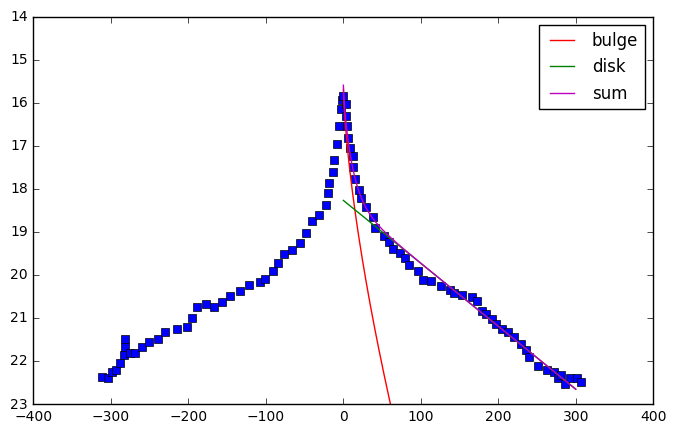

In [41]:
p_ = np.arange(0.1, 300., 0.1)

bulge_I = [mu_bulge(l, mu_eff=mu_eff_I, r_eff=r_eff_I, n=n_I) for l in p_]
disc_I = [mu_disc(l, mu0=mu0d_I, h=h_disc_I) for l in p_]
total_profile = total_mu_profile(bulge_I, disc_I)

r_phot, mu_phot = zip(*np.loadtxt("photom_I.dat", float, delimiter=','))

fig = plt.figure(figsize=[8, 5])
plt.plot(r_phot, mu_phot, 's')
plt.plot(p_, bulge_I, '-', label='bulge', color='red')
plt.plot(p_, disc_I, '-', label='disk', color='green')
plt.plot(p_, total_profile, '-', label='sum', color='m')
plt.ylim(23, 14)
plt.legend()
plt.show()

Похоже. Оценка ${M/L}_I$ для диска у них в работе 0.97, посмотрим: 

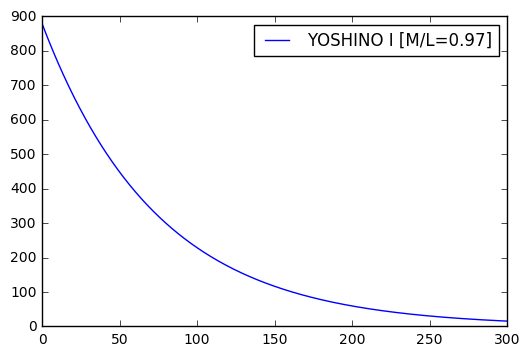

In [42]:
M_to_L_I = 0.97
surf_I = [surf_density(mu=m, M_to_L=M_to_L_I, band='I') for m in disc_I]

plt.plot(p_, surf_I, '-', label='YOSHINO I [M/L={:2.2f}]'.format(M_to_L_I))
plt.legend()

У них нет картинок для $V$ и $J$, но можно посмотреть на них тоже:

In [43]:
# for V band
r_eff_V = 10.34
mu_eff_V = 18.57
n_V = 1.5
mu0d_V = 19.54
h_disc_V = 78.55
M_to_L_V = 1.74
disc_V = [mu_disc(l, mu0=mu0d_V, h=h_disc_V) for l in p_]

In [44]:
# for J band
r_eff_J = 7.31
mu_eff_J = 16.43
n_J = 1.5
mu0d_J = 16.37
h_disc_J = 38.95
M_to_L_J = 0.95
disc_J = [mu_disc(l, mu0=mu0d_J, h=h_disc_J) for l in p_]

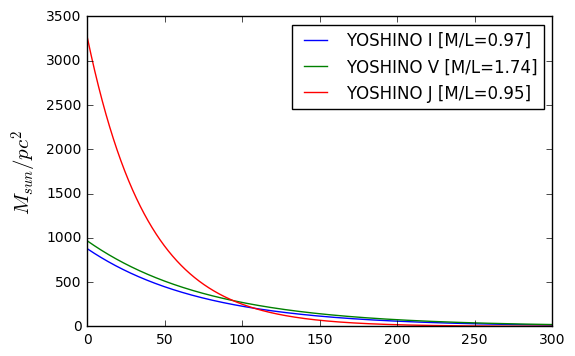

In [45]:
surf_V = [surf_density(mu=m, M_to_L=M_to_L_V, band='V') for m in disc_V]
surf_J = [surf_density(mu=m, M_to_L=M_to_L_J, band='J') for m in disc_J]

plt.plot(p_, surf_I, '-', label='YOSHINO I [M/L={:2.2f}]'.format(M_to_L_I))
plt.plot(p_, surf_V, '-', label='YOSHINO V [M/L={:2.2f}]'.format(M_to_L_V))
plt.plot(p_, surf_J, '-', label='YOSHINO J [M/L={:2.2f}]'.format(M_to_L_J))
plt.ylabel('$M_{sun}/{pc}^2$', fontsize=15.)
plt.legend()

В $J$ похоже что-то не то, возьмем другие две.

Действительно ли это много? Да, похоже таких массивных дисков не бывает.

In [46]:
all_photometry.append(('YOSHINO I', r_eff_I, mu_eff_I, n_I, mu0d_I, h_disc_I, M_to_L_I, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_I, h=h_disc_I), M_to_L=M_to_L_I, band='I')))

all_photometry.append(('YOSHINO V', r_eff_V, mu_eff_V, n_V, mu0d_V, h_disc_V, M_to_L_V, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_V, h=h_disc_V), M_to_L=M_to_L_V, band='V')))

all_photometry.append(('YOSHINO J', r_eff_J, mu_eff_J, n_J, mu0d_J, h_disc_J, M_to_L_J, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_J, h=h_disc_J), M_to_L=M_to_L_J, band='J')))

In [47]:
from tabulate import tabulate
import pandas as pd

df = pd.DataFrame(data=all_photometry, columns=['Name', 'r_eff', 'mu_eff', 'n', 'mu0_d', 'h_disc', 'M/L', 'surf'])
df['M/L'] = df['M/L'].apply(lambda l: '%2.2f'%l)
print tabulate(df, headers='keys', tablefmt='psql')

+----+-----------+---------+----------+-----+---------+----------+-------+-------------------------------------------+
|    | Name      |   r_eff |   mu_eff |   n |   mu0_d |   h_disc |   M/L | surf                                      |
|----+-----------+---------+----------+-----+---------+----------+-------+-------------------------------------------|
|  0 | YOSHINO I |   14.89 |    18.48 | 1.5 |   18.26 |    74.24 |  0.97 | <function <lambda> at 0x000000000A925EB8> |
|  1 | YOSHINO V |   10.34 |    18.57 | 1.5 |   19.54 |    78.55 |  1.74 | <function <lambda> at 0x000000000C79B9E8> |
|  2 | YOSHINO J |    7.31 |    16.43 | 1.5 |   16.37 |    38.95 |  0.95 | <function <lambda> at 0x000000000CEFB048> |
+----+-----------+---------+----------+-----+---------+----------+-------+-------------------------------------------+


### Сравнение с Кривой вращения тонкого диска

Можно провести тест-сравнение с кривой вращения тонкого диска при заданной фотометрии, если она слишком массивная - то не брать ее (это ограничение сверху).  

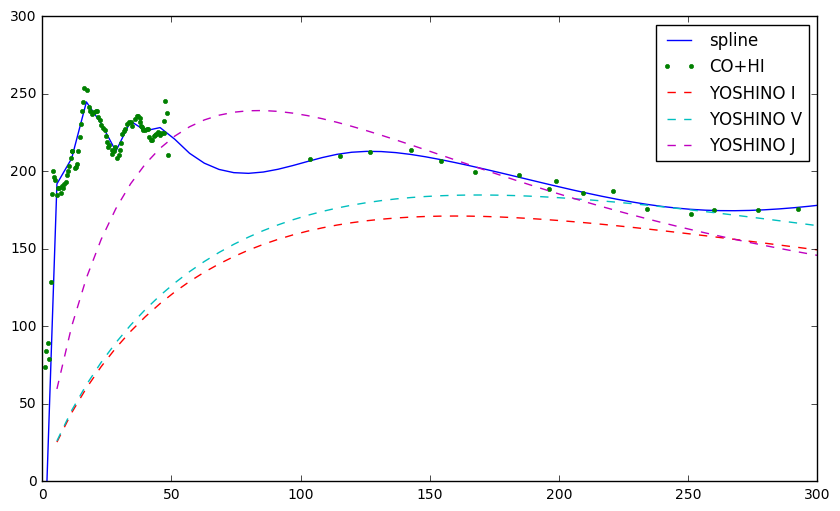

In [48]:
fig = plt.figure(figsize=[10,6])

plt.plot(test_points, spl_gas(test_points), '-', label='spline')

plt.plot(_1, _2, '.', label='CO+HI')

for photom in all_photometry:
    plt.plot(test_points, map(lambda l: disc_vel(l, photom[7](0), photom[5], scale), test_points), '--', label=photom[0])


plt.ylim(0, 300)
plt.xlim(0, 300)
plt.legend(loc='best')
plt.show()

Видно, что $J$ не подходит.

## Зоны звездообразования



$\rm{H_{\alpha}}$, $UV$

* вот тут старые данные по UV и Halpha http://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?1993A%26A...268..419C&amp;data_type=PDF_HIGH&amp;whole_paper=YES&amp;type=PRINTER&amp;filetype=.pdf
* вот тут должна быть картинка из GALEX http://iopscience.iop.org/article/10.1086/523853/pdf но ее нет(

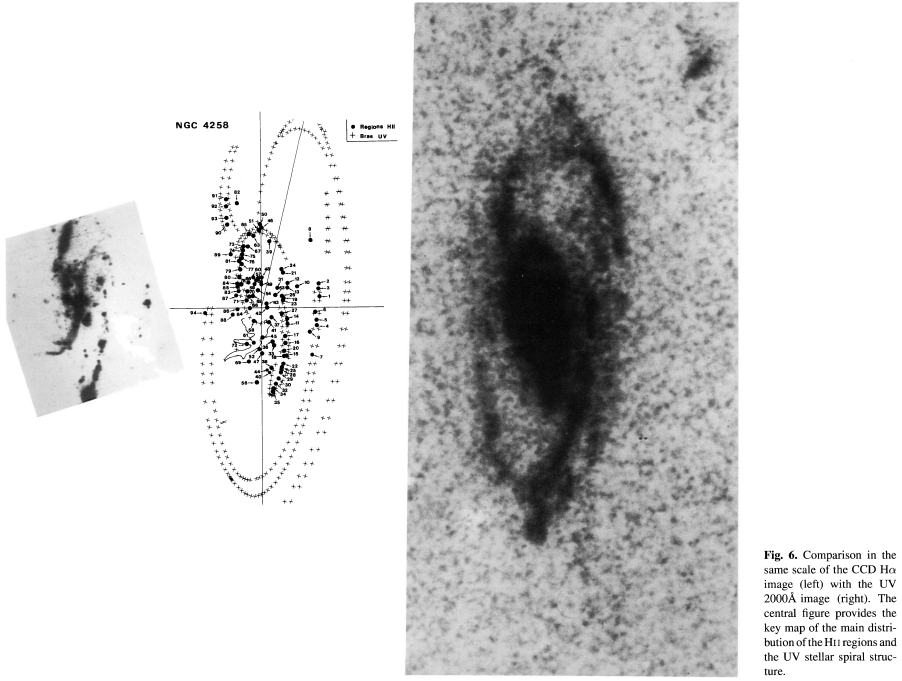

In [49]:
Image('halpha.png', width=1700) #две картинки - Halpha и UV

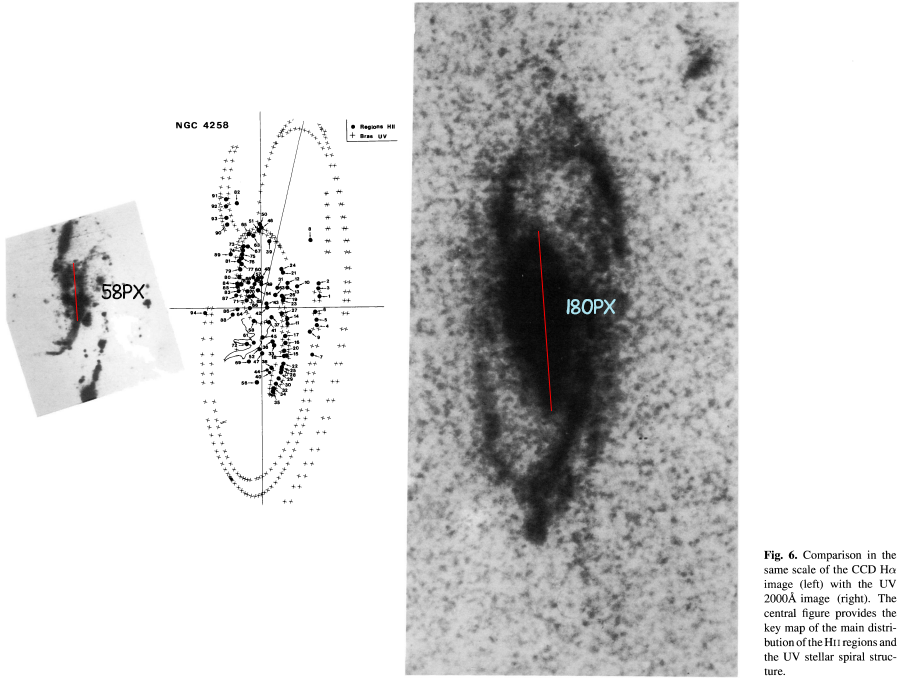

In [50]:
Image('halpha_dist.png', width=600)

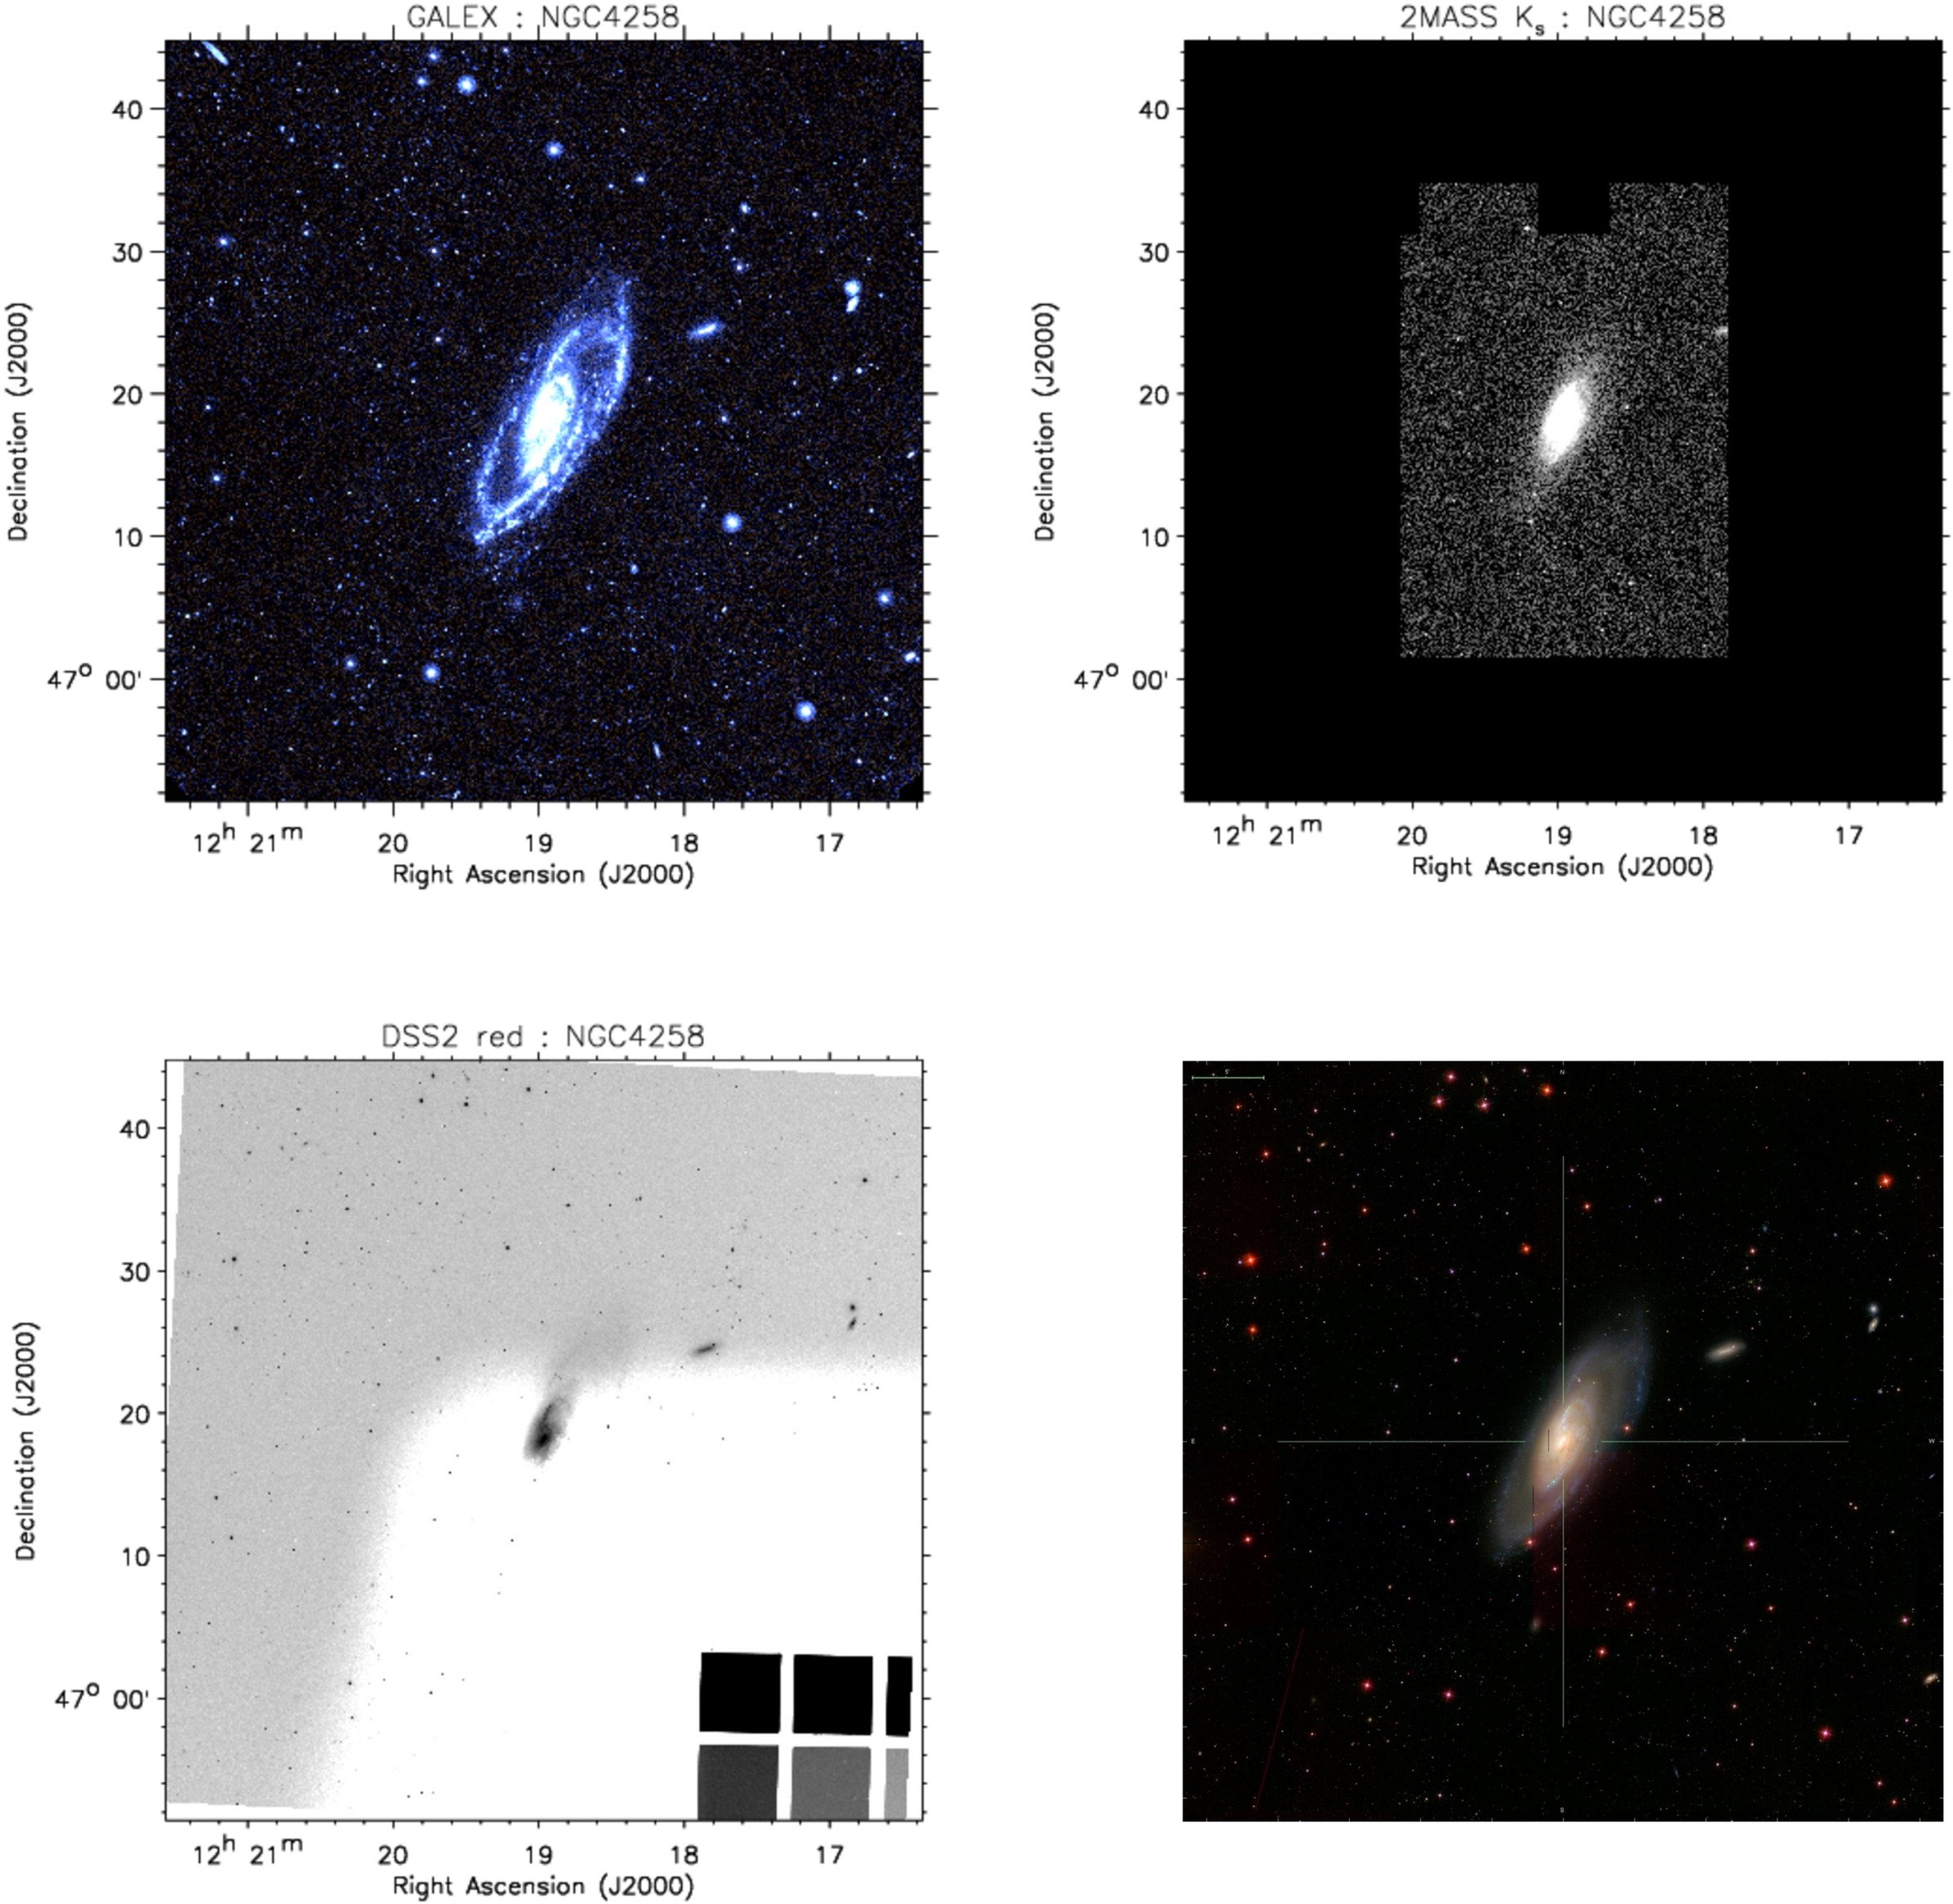

In [51]:
Image('large-fg16_19.jpeg')

Multiwavelength imaging of XUV-disk galaxies. For each object we present (a) GALEX FUVand NUV, (b) 2MASS-Ks, (c) DSS2-red, and (d ) SDSS-DR5
imaging (when available). In the case of SDSS, we display the gri bands as blue, green, and red channels. The extent of all images is 3 times the D25 size of the galaxy.  The print figure only presents two galaxies of each XUV-disk variety, as a guide to content. NGC 772 and NGC 4254 (M99) are shown as examples of Type 1, UGC 10445
and NGC 7418A for mixed-type objects, and NGC 2090 and NGC 2541 for Type 2 XUV-disks. [See the electronic edition of the Supplement for complete set
of Figs. 16.1-16.54.]

Мне кажется, что центральная яркая область довольно большая, порядка 10', но точно не понятно.

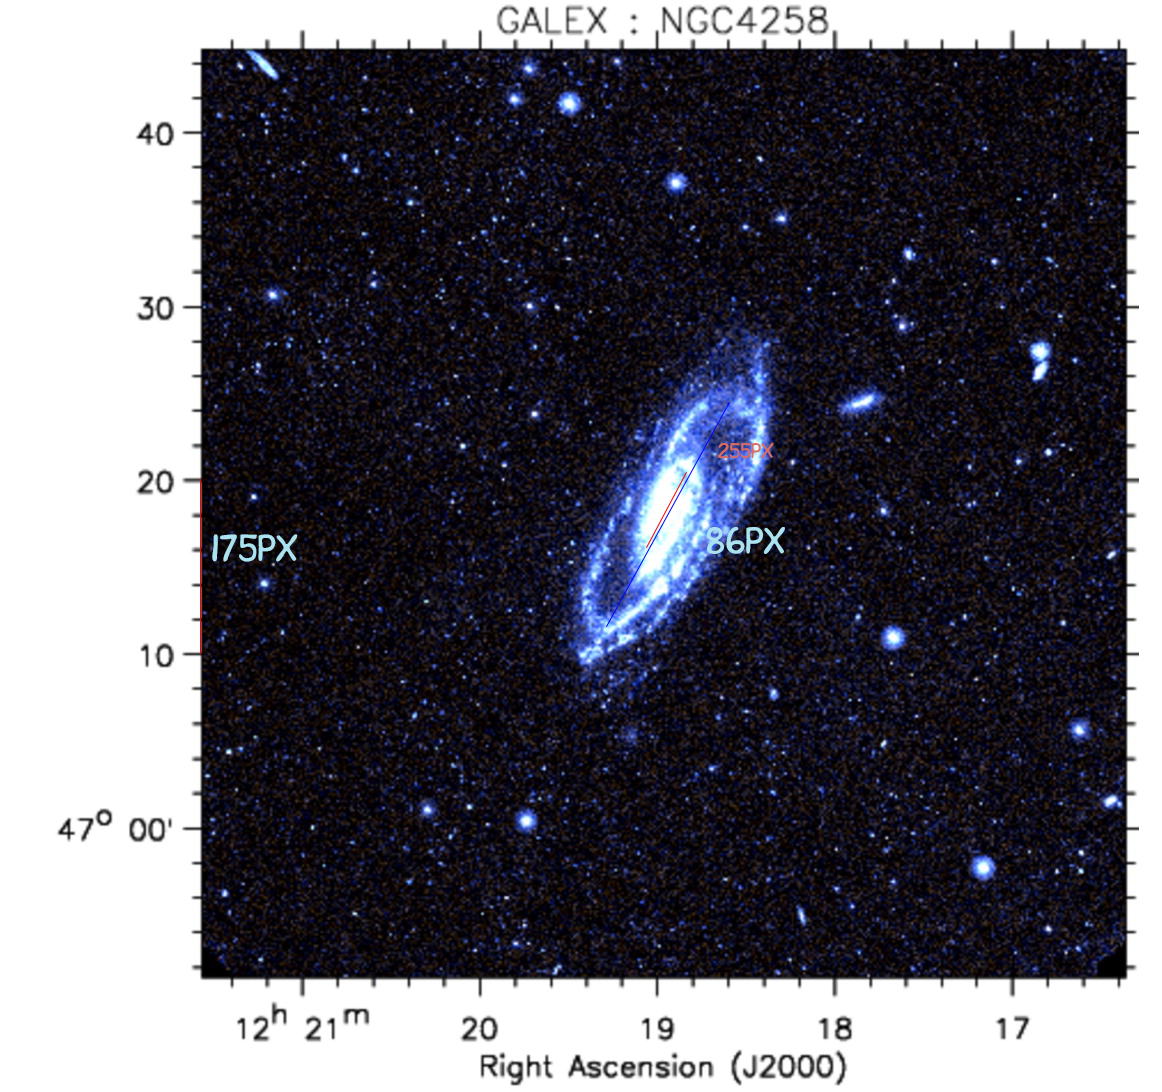

In [52]:
Image('large-fg16_19_dist.png', width=500)

(0, 200)

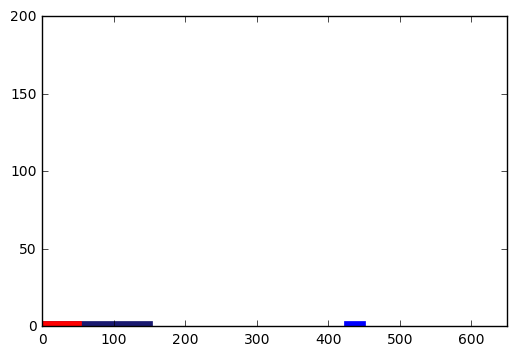

In [53]:
def plot_SF(ax):
    ax.plot([0., 86./2/(175./600.)], [0., 0.], '-', lw=7., color='midnightblue')
    ax.plot([0., 150*58./180.], [0., 0.], '-', lw=7., color='r')
    ax.plot([250./2/(175./600.), 260./2/(175./600.)], [0., 0.], '-', lw=7., color='b') #внешняя спираль
    
plot_SF(plt.gca())
plt.xlim(0, 650)
plt.ylim(0, 200)

## Неустойчивость

### Одножидкостная

Устойчиво, когда > 1:
$$Q_g = \frac{\Sigma_g^{cr}}{\Sigma_g}=\frac{\kappa c_g}{\pi G \Sigma_g}$$
$$Q_s = \frac{\Sigma_s^{cr}}{\Sigma_s}=\frac{\sigma_R}{\sigma_R^{min}}=\frac{\kappa \sigma_R}{3.36 G \Sigma_s}$$

In [54]:
sound_vel = 6.  #скорость звука в газе, км/с
data_lim = max(r_sig_ma) #где заканчиваются данные

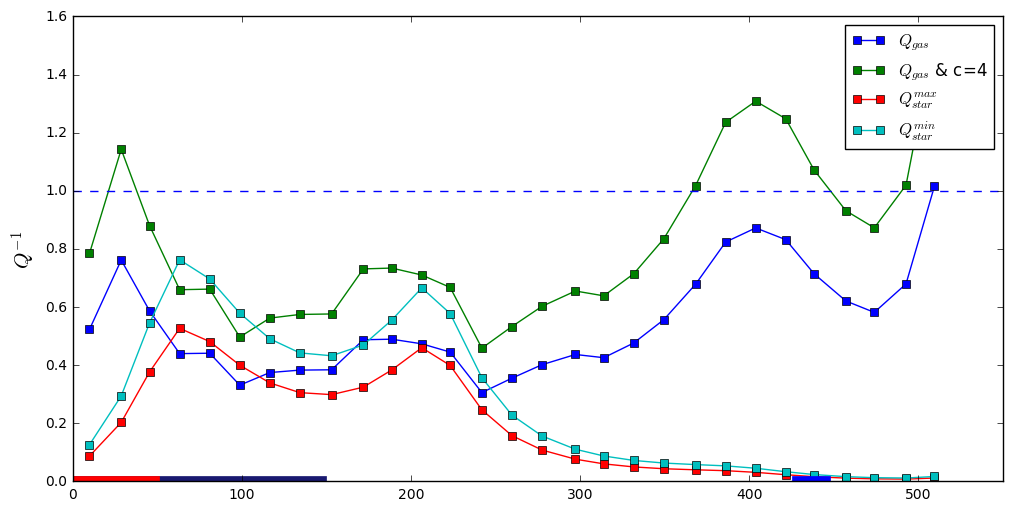

In [55]:
fig = plt.figure(figsize=[12, 6])
gd_data = zip(r_g_dens, gas_dens)
#кроме первой точки, т.к. там деление на ноль
plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=sound_vel, gas_density=l[1]) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{gas}$')
plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=4., gas_density=l[1]) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{gas}$ & c=4')

plt.plot(r_g_dens, [1./Qs(epicycl=l[0], sigma=l[1], star_density=l[2]) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens],
                        map(sig_R_maj_max, r_g_dens), 
                        [surf_density(l_, M_to_L_I, 'I') for l_ in [mu_disc(ll, mu0=mu0d_I, h=h_disc_I) for ll in r_g_dens]])], 's-', label='$Q_{star}^{max}$')

plt.plot(r_g_dens, [1./Qs(epicycl=l[0], sigma=l[1], star_density=l[2]) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens],
                        map(sig_R_maj_min, r_g_dens), 
                        [surf_density(l_, M_to_L_I, 'I') for l_ in [mu_disc(ll, mu0=mu0d_I, h=h_disc_I) for ll in r_g_dens]])], 's-', label='$Q_{star}^{min}$')

plt.axhline(y=1, ls='--')
plt.legend()
plot_SF(plt.gca())
plt.ylabel('$Q^{-1}$', fontsize=15)
plt.xlim(0., 550)
plt.show()

Видно, что в центре с кучей газа неустойчивость, но эффект быстро спадает.

**НЕ ИСПРАВЛЕНО ЗА 1.6!** Т.к. тут еще сравнение с звездным Q.

Для внешней спирали что-то видно, давайте исправим за 1.6 и сохраним картинку:

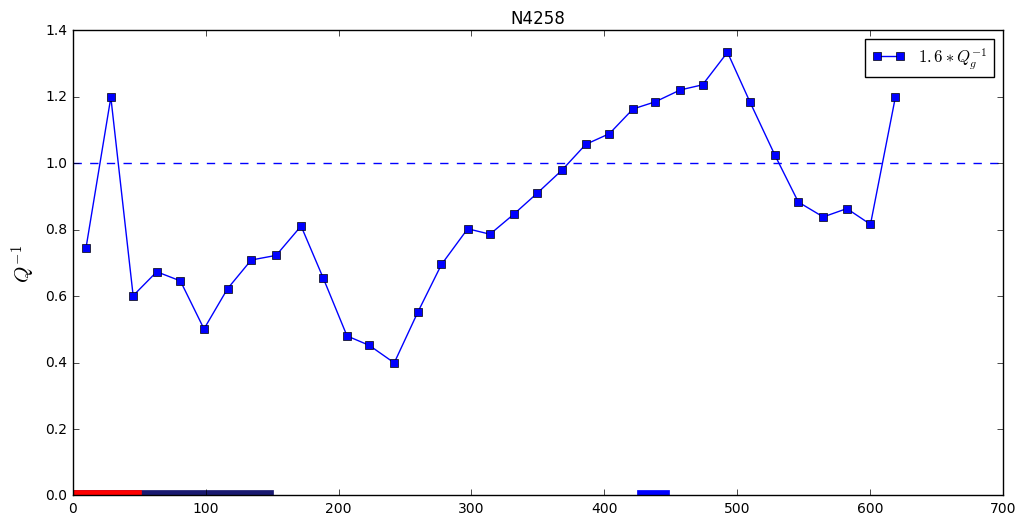

In [56]:
fig = plt.figure(figsize=[12, 6])
gd_data = zip(r_g_dens, gas_dens)

plt.plot(r_g_dens, [1.6/Qg(epicycl=l[0], sound_vel=sound_vel, gas_density=l[1]) for l in 
                    zip([epicyclicFreq_real(spl_gas, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$1.6*Q_{g}^{-1}$')

plt.axhline(y=1, ls='--')
plt.legend()
plot_SF(plt.gca())
plt.ylabel('$Q^{-1}$', fontsize=15)
plt.title(name)
plt.savefig('..\\..\pics\\instab_spirals\\'+name+'_spiral'+'.png', format='png', bbox_inches='tight')
plt.show()

### Двухжидкостная

Кинетическое приближение:
$$\frac{1}{Q_{\mathrm{eff}}}=\frac{2}{Q_{\mathrm{s}}}\frac{1}{\bar{k}}\left[1-e^{-\bar{k}^{2}}I_{0}(\bar{k}^{2})\right]+\frac{2}{Q_{\mathrm{g}}}s\frac{\bar{k}}{1+\bar{k}^{2}s^{2}}>1\,$$

Гидродинамическое приближение:
$$\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{s}}}{\kappa+k^{2}\sigma_{\mathrm{s}}}+\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{g}}}{\kappa+k^{2}c_{\mathrm{g}}}>1$$ или $$\frac{1}{Q_{\mathrm{eff}}}=\frac{2}{Q_{\mathrm{s}}}\frac{\bar{k}}{1+\bar{k}^{2}}+\frac{2}{Q_{\mathrm{g}}}s\frac{\bar{k}}{1+\bar{k}^{2}s^{2}}>1$$ для безразмерного волнового числа ${\displaystyle \bar{k}\equiv\frac{k\,\sigma_{\mathrm{s}}}{\kappa}},\, s=c/\sigma$

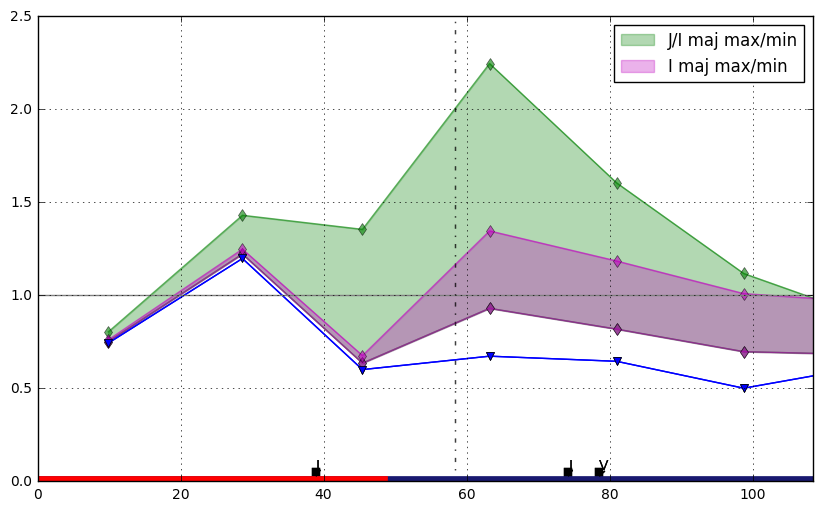

In [57]:
total_gas_data = zip(r_g_dens, map(lambda l: l, gas_dens))[:7]
disk_scales = [(l[5], l[0].split(' ')[1]) for l in all_photometry]


fig = plt.figure(figsize=[10, 6])
ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data, epicycl=epicyclicFreq_real, 
              gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_J, h=h_disc_J), M_to_L_J, 'J'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_I, h=h_disc_I), M_to_L_I, 'I'), 
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='J/I maj max/min')

plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data, epicycl=epicyclicFreq_real, 
              gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_I, h=h_disc_I), M_to_L_I, 'I'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_I, h=h_disc_I), M_to_L_I, 'I'), 
              data_lim=data_lim, color='m', alpha=0.3, disk_scales=disk_scales, label='I maj max/min')

plt.ylim(0., 2.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid()
plt.show()

## Картинка 

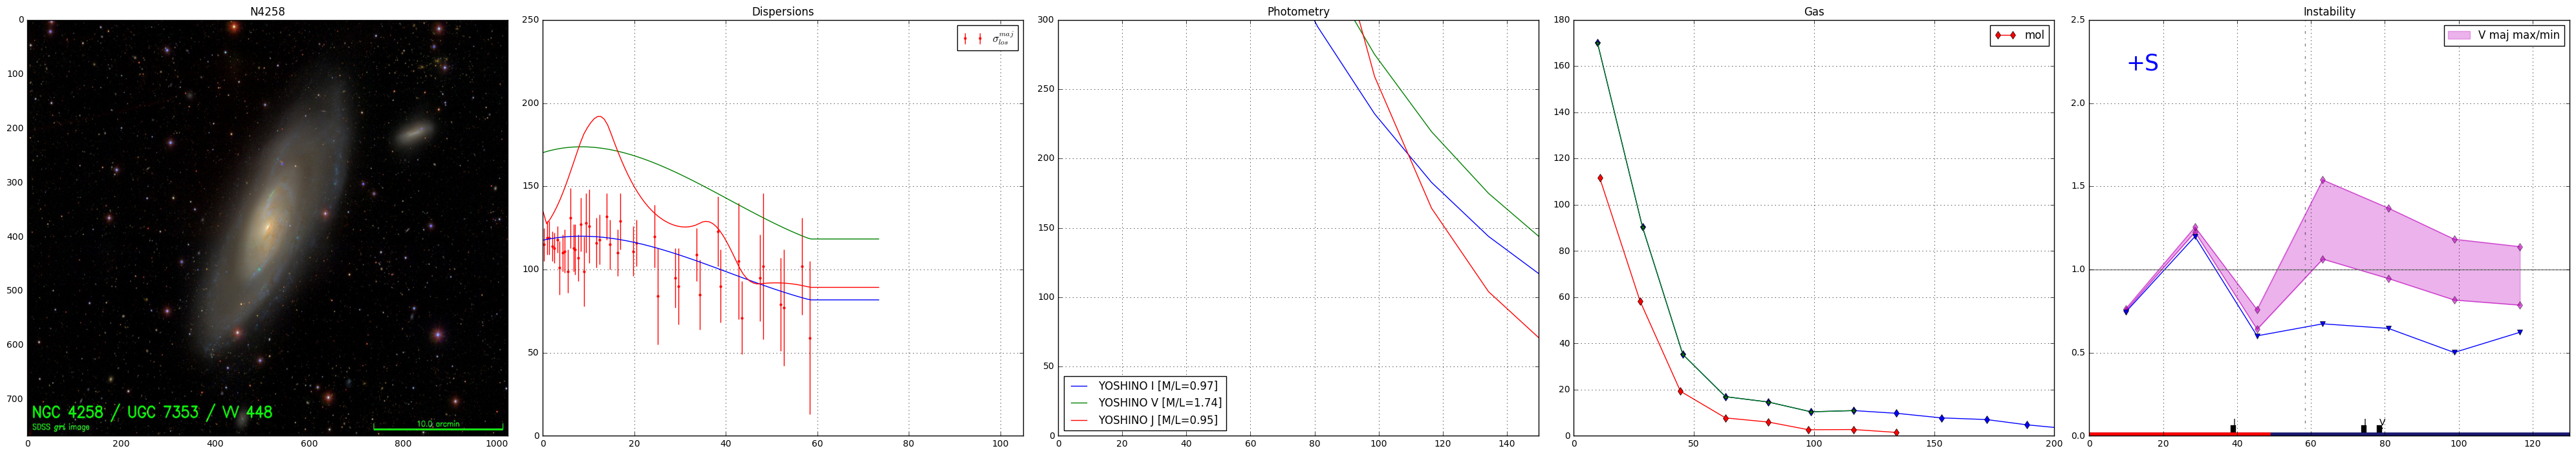

In [58]:
summary_imgs_path = '..\\..\pics\\notebook_summary\\'

def save_model_plot(path):
    fig, axes = plt.subplots(1, 5, figsize=[40,7])
    fig.tight_layout()
    
    axes[0].imshow(ImagePIL.open('n4258_SDSS_labeled.jpg'), aspect='auto')
    axes[0].set_title(name)
    
    try:
        axes[1].errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{maj}$')
        axes[1].plot(points, map(sig_R_maj_min, points))
        axes[1].plot(points, map(sig_R_maj_max, points))
        axes[1].plot(points, map(sig_R_maj_maxmaxtrue, points))
    except Exception:
        pass
    
    try:
        axes[1].errorbar(r_sig_mi, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{min}$')
        axes[1].plot(points, map(sig_R_minor_min, points), '--')
        axes[1].plot(points, map(sig_R_minor_max, points), '--')
    except Exception:
        pass

    axes[1].set_ylim(0,250)
    axes[1].set_xlim(0, 105)  
    axes[1].grid()
    axes[1].legend()
    axes[1].set_title('Dispersions')
    
    for photom in all_photometry:
        axes[2].plot(r_g_dens, map(photom[-1], r_g_dens), '-', label='{} [M/L={:2.2f}]'.format(photom[0], photom[-2]))
    axes[2].set_xlim(0, 150)
    axes[2].set_ylim(0, 300)
    axes[2].set_title('Photometry')
    axes[2].grid()
    axes[2].legend(loc='lower left')
    
    axes[3].plot(r_g_dens, gas_dens, 'd-')
    axes[3].plot(zip(*total_gas_data)[0], zip(*total_gas_data)[1], '*-')
    axes[3].plot(r_mol_dens, mol_dens, 'd-', label='mol')
    axes[3].set_title('Gas')
    axes[3].grid()
    axes[3].set_xlim(0, 200)
    axes[3].legend()
    
    #change this
    plot_2f_vs_1f(ax=axes[4], total_gas_data=total_gas_data, epicycl=epicyclicFreq_real, 
                  gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_V, h=h_disc_V), M_to_L_V, 'V'), 
                  star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_V, h=h_disc_V), M_to_L_V, 'V'), 
                  data_lim=data_lim, color='m', alpha=0.3, disk_scales=disk_scales, label='V maj max/min')

    axes[4].set_ylim(0., 2.5)
    axes[4].set_xlim(0., 130.)
    axes[4].axhline(y=1., ls='-', color='grey')
    plot_SF(axes[4])
    axes[4].grid()
    axes[4].set_title('Instability')
    axes[4].text(10., 2.2, '+S', fontsize=25., color='b')
       
    plt.savefig(path+name+'.png', format='png', bbox_inches='tight')
    plt.show()
    
save_model_plot(summary_imgs_path)

## Учет толщины

## Эксперименты

In [88]:
%%time
gas_data = zip(r_g_dens, gas_dens)[:7]
invQg, invQs, invQeff = zip(*get_invQeff_from_data(gas_data=gas_data, 
                                epicycl=epicyclicFreq_real, 
                                gas_approx=gas_approx,
                                sound_vel=sound_vel, 
                                scale=scale,
                                sigma=sig_R_maj_maxmax,
                                star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_I, h=h_disc_I), M_to_L_I, 'I')))

Wall time: 4.09 s


The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


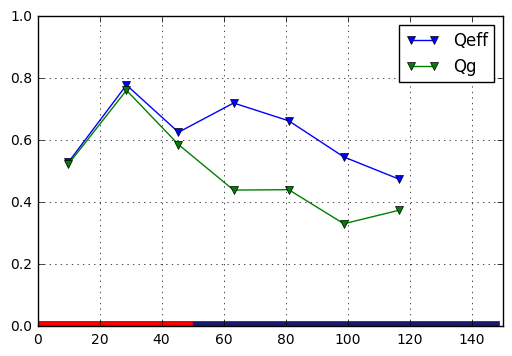

In [89]:
plt.plot(r_g_dens[:7], invQeff, 'v-', label='Qeff')
plt.plot(r_g_dens[:7], invQg, 'v-', label='Qg')
plt.ylim(0., 1.)
plt.xlim(0., 150.)
plot_SF(plt.gca())
plt.legend()
plt.grid()
plt.show()

In [90]:
%%time
gas_data = zip(r_g_dens, gas_dens)[:7]
invQg, invQs, invQeff = zip(*get_invQeff_from_data(gas_data=gas_data, 
                                epicycl=epicyclicFreq_real, 
                                gas_approx=gas_approx,
                                sound_vel=sound_vel, 
                                scale=scale,
                                sigma=sig_R_maj_maxmaxtrue,
                                star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_I, h=h_disc_I), M_to_L_I, 'I')))

Wall time: 4.46 s


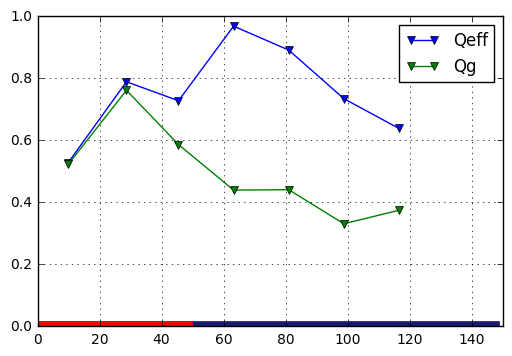

In [91]:
plt.plot(r_g_dens[:7], invQeff, 'v-', label='Qeff')
plt.plot(r_g_dens[:7], invQg, 'v-', label='Qg')
plt.ylim(0., 1.)
plt.xlim(0., 150.)
plot_SF(plt.gca())
plt.legend()
plt.grid()
plt.show()

In [92]:
%%time
gas_data = zip(r_g_dens, gas_dens)[:7]
invQg, invQs, invQeff = zip(*get_invQeff_from_data(gas_data=gas_data, 
                                epicycl=epicyclicFreq_real, 
                                gas_approx=gas_approx,
                                sound_vel=sound_vel, 
                                scale=scale,
                                sigma=sig_R_maj_minmin,
                                star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_I, h=h_disc_I), M_to_L_I, 'I')))

Wall time: 3.96 s


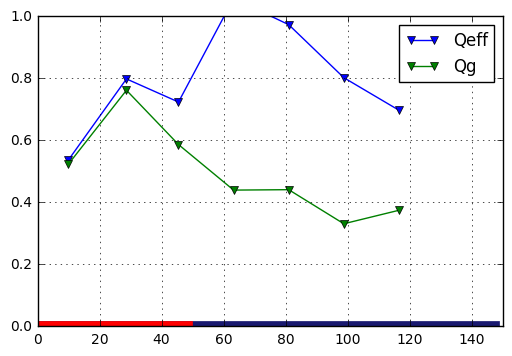

In [93]:
plt.plot(r_g_dens[:7], invQeff, 'v-', label='Qeff')
plt.plot(r_g_dens[:7], invQg, 'v-', label='Qg')
plt.ylim(0., 1.)
plt.xlim(0., 150.)
plot_SF(plt.gca())
plt.legend()
plt.grid()
plt.show()

In [94]:
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
import plotly.plotly as py
import plotly.graph_objs as go
init_notebook_mode(connected=True)

acc_dot = go.Scatter(
    x = r_g_dens[:7], 
    y = invQeff,
    mode='lines+markers',
    name = 'Qeff',
    marker=dict(
        size='16',
        color = ['#770000']*len(invQeff))
)
qgdat = go.Scatter(
    x = r_g_dens[:5], 
    y = invQg,
    mode='lines+markers',
    name = 'Qg',
    marker=dict(
        size='16',
        color = ['#007700']*len(invQeff))
)
data = [acc_dot, qgdat]

iplot(data, filename='scatter-plot-with-colorscale')

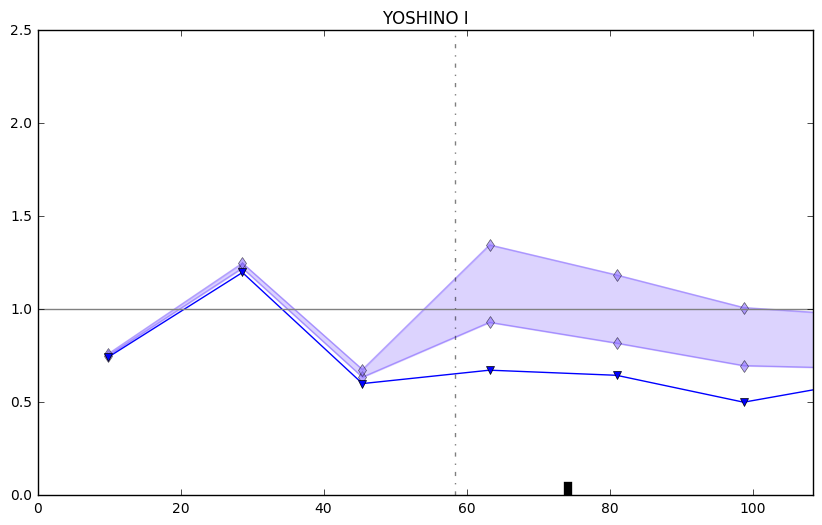

In [61]:
from matplotlib.animation import FuncAnimation

total_gas_data = zip(r_g_dens, map(lambda l: l, gas_dens))[:7]

fig = plt.gcf()
plt.figure(figsize=(10,6))

ax = plt.gca()

def animate(i):
    ax.cla()
    plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data, epicycl=epicyclicFreq_real, gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=all_photometry[i][-1], 
              star_density_min=all_photometry[i][-1],
              data_lim=data_lim, color=np.random.rand(3), alpha=0.3, disk_scales=[(all_photometry[i][5], '')])
    ax.axhline(y=1., ls='-', color='grey')
    ax.set_title(all_photometry[i][0])
    ax.set_ylim(0., 2.5)
    return ax
anim = FuncAnimation(plt.gcf(), animate, frames=len(all_photometry), interval=1000)

In [62]:
anim.save('..\\..\pics\\'+name+'.gif', writer='imagemagick', fps=1)

In [63]:
from IPython.display import HTML
HTML(anim.to_html5_video())

### Другие механизмы

Schaye (2004), 'cold gas phase':
$$\Sigma_g > 6.1 f_g^{0.3} Z^{-0.3} I^{0.23}$$
или при constant metallicity of 0.1 $Z_{sun}$ and interstellar flux of ionizing photons 10^6 cm−2 s−1:
$$\Sigma_g > 6.1 \frac{\Sigma_g}{\Sigma_g + \Sigma_s}$$

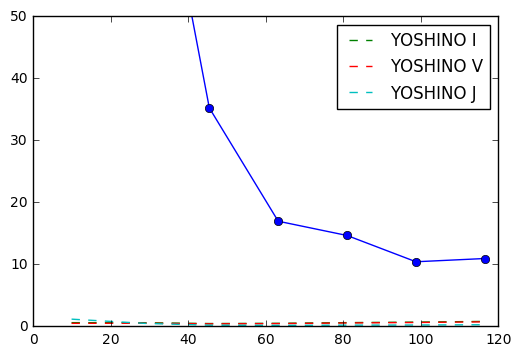

In [61]:
plt.plot(zip(*total_gas_data)[0], zip(*total_gas_data)[1], 'o-')

for photom in all_photometry:
    dens_s04 = [Sigma_crit_S04(l[0], l[1], photom[7]) for l in total_gas_data]
    plt.plot(zip(*total_gas_data)[0], dens_s04, '--', label=photom[0])

plt.legend()
plt.ylim(0, 50.)
plt.show()

Видимо везде неустойчиво.

Hunter et al (1998), 'competition with shear' according to Leroy: 
$$\Sigma_A = \alpha_A\frac{\sigma_g A}{\pi G}$$

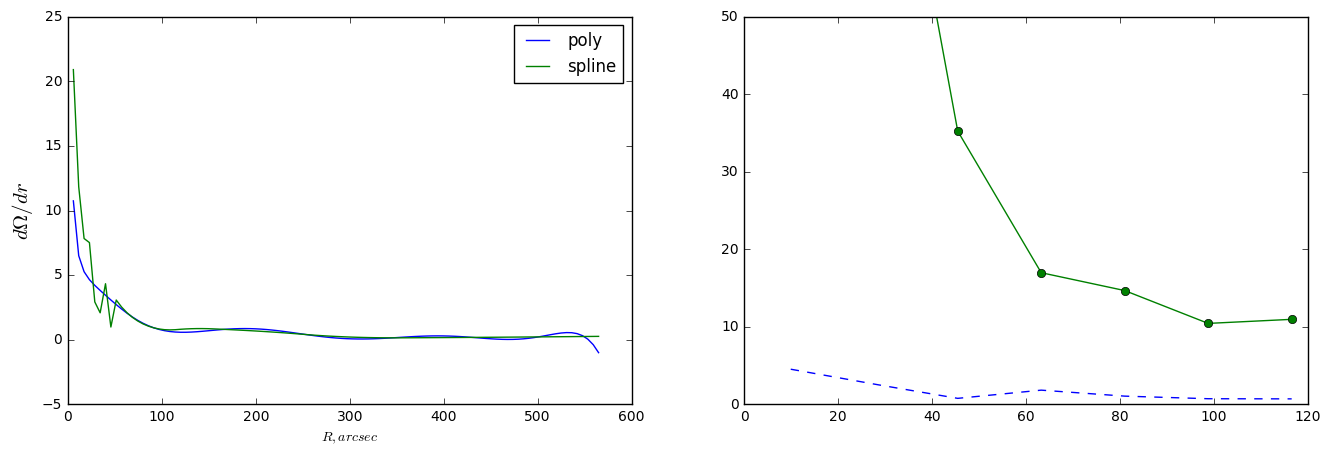

In [60]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=[16, 5])
ax1.plot(test_points, [oort_a(x, gas_approx) for x in test_points], '-', label='poly')
ax1.plot(test_points, [oort_a(x, spl_gas) for x in test_points], '-', label='spline')
ax1.set_xlabel('$R, arcsec$')
ax1.set_ylabel('$d\Omega/dr$', fontsize=15)
ax1.legend()

dens_A = [Sigma_crit_A(l, spl_gas, 2., 6.) for l in zip(*total_gas_data)[0]]
ax2.plot(zip(*total_gas_data)[0], dens_A, '--')
ax2.plot(zip(*total_gas_data)[0], zip(*total_gas_data)[1], 'o-')
ax2.set_ylim(0, 50.)

plt.show()

Непонятно, судя по всему тоже везде неустойчиво.

### Отношение водорода к молекулярному газу

Из https://ui.adsabs.harvard.edu/#abs/2016MNRAS.460.1106W/abstract:
два возможных вида связи между молекулярным и атомарным газом $R_{mol} = \Sigma_{H_2}/\Sigma_{HI}$:

$$R_{mol} = \Sigma_{star}/81$$ или 
$$R_{mol} = \left(\frac{P_h}{1.7 \times 10^4 cm^{-3}K k_B } \right)^{0.8},\, P_h = \frac{\pi}{2}G\Sigma_g(\Sigma_g + \frac{\sigma_g}{\sigma_z}\Sigma_{star})$$

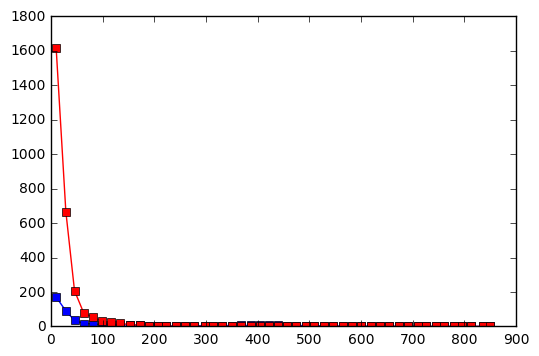

In [97]:
def R1(Sigma_star):
    return Sigma_star/81.

def h2_gas(r, h_gas_dens):
    return R1(star_density(r))*h_gas_dens

star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_I, h=h_disc_I), M_to_L_I, 'I')

plt.plot(r_g_dens, gas_dens, 's-', color='b')
plt.plot(r_g_dens, [h2_gas(_[0], _[1]) for _ in  zip(r_g_dens, gas_dens)], 's-', color='r')
plt.show()

Вторая оценка - малой оси у нас нет и придется вытаскивать из большой:

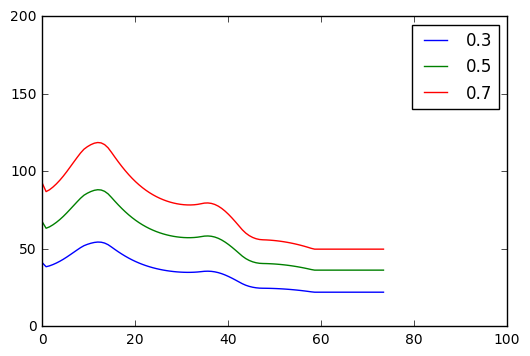

In [98]:
@flat_end(sig_maj_lim)
def sig_R_maj_true(r, alpha, spl_maj=spl_maj):
    return spl_maj(r)/sqrt(sigPhi_to_sigR_real(r)*sin_i**2 + alpha**2 * cos_i**2)

@flat_end(sig_maj_lim)
def sig_z(r, alpha, spl_maj=spl_maj):
    return sig_R_maj_true(r, alpha, spl_maj=spl_maj)*alpha

plt.plot(points, map(lambda l: sig_z(l, 0.3), points), label = '0.3')
plt.plot(points, map(lambda l: sig_z(l, 0.5), points), label = '0.5')
plt.plot(points, map(lambda l: sig_z(l, 0.7), points), label = '0.7')

plt.legend()
plt.ylim(0,200)
plt.xlim(0,100)
plt.show()

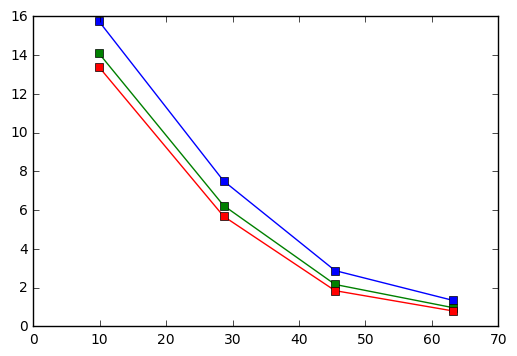

In [99]:
def R2(r, h_gas_dens, alpha, sound_vel):
    G = 6.67408
    kB = 3.7529917
    Ph = np.pi/2. * G * h_gas_dens * (h_gas_dens + sound_vel/sig_z(r, alpha) * star_density(r))
    return np.power(4.363474*Ph/(1.7 * 10000. * kB) , 0.8)

def h2_gas2(r, h_gas_dens, alpha, sound_vel):
    return R2(r, h_gas_dens, alpha, sound_vel)*h_gas_dens

plt.plot(r_g_dens[:4], [R2(_[0], _[1], 0.3, 6.) for _ in  zip(r_g_dens, gas_dens)[:4]], 's-')
plt.plot(r_g_dens[:4], [R2(_[0], _[1], 0.5, 6.) for _ in  zip(r_g_dens, gas_dens)[:4]], 's-')
plt.plot(r_g_dens[:4], [R2(_[0], _[1], 0.7, 6.) for _ in  zip(r_g_dens, gas_dens)[:4]], 's-')
plt.show()

И теперь сравнение с настоящим значением:

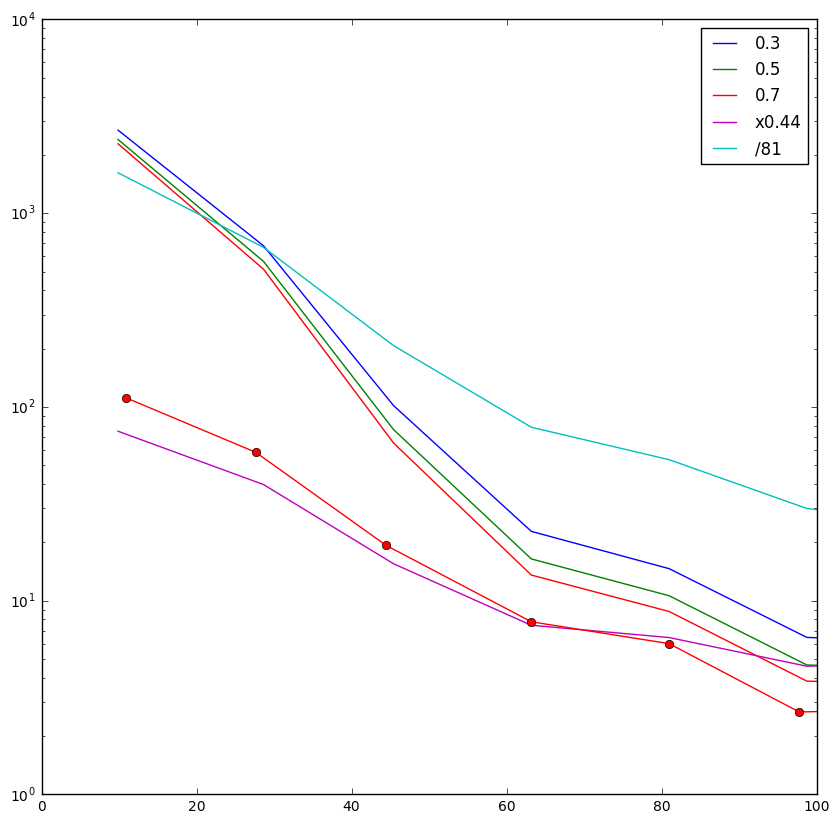

In [100]:
fig = plt.figure(figsize=[10, 10])

# plt.plot(r_g_dens, gas_dens, 's-', color='b')
plt.semilogy(r_g_dens, [h2_gas2(_[0], _[1], 0.3, 6.) for _ in  zip(r_g_dens, gas_dens)], '-', label='0.3')
plt.semilogy(r_g_dens, [h2_gas2(_[0], _[1], 0.5, 6.) for _ in  zip(r_g_dens, gas_dens)], '-', label='0.5')
plt.semilogy(r_g_dens, [h2_gas2(_[0], _[1], 0.7, 6.) for _ in  zip(r_g_dens, gas_dens)], '-', label='0.7')

plt.semilogy(r_g_dens, map(lambda l: 0.44*l, gas_dens), '-', color='m', label='x0.44')
plt.semilogy(r_mol_dens, mol_dens, 'o-', color='r')

plt.semilogy(r_g_dens, [h2_gas(_[0], _[1]) for _ in  zip(r_g_dens, gas_dens)], '-', label='/81')

plt.legend()
plt.ylim(1., 10000.)
plt.xlim(0, 100)
plt.show()

Видно, что 1.44 лучше всего описывает наблюдения.

In [53]:
qg = 6.16
qs = 11.06
s = 0.03587

def predict_hydro_unstable_Qs(Qg, s):
    '''Рассчитывает величину Qs, при которой достигается минимальная неустойчивость.
    Для этого выражения для двухжидкостной неуст в кинематич. приближении приравнивается 1 
    и максимум выражения ниже и есть искомое.'''
    fuu = lambda l: 2*k*Qg*(1+k**2*s**2)/(1+k**2)/(Qg+Qg*k**2*s**2 - 2*s*k)
    candidate_Qs = max([fuu(k) for k in np.arange(0.01, 60000., 1.)])
    Qeff = findInvKinemQeffBrute(candidate_Qs, Qg, s, np.arange(0.01, 60000., 1.))[0]
    assert abs(Qeff-1) < 0.2
    return candidate_Qs

In [54]:
predict_hydro_unstable_Qs(qg, s)

1.0118366914349535

In [55]:
Qgs = []
Qss = []
invQeff = []
for r, gd in zip(r_g_dens, gas_dens)[1:7]: #только до 90" берем, дальне нет данных по дисперсии
    Qgs.append(Qg(epicycl=epicyclicFreq_real(gas_approx, r, scale), sound_vel=sound_vel, gas_density=gd*1.44))
    Qss.append(predict_hydro_unstable_Qs(Qgs[-1], sound_vel/sig_R_approx(r)))
    qeff = findInvHydroQeffBrentq(Qss[-1], Qgs[-1], sound_vel/sig_R_approx(r), np.arange(0.01, 60000., 1.))
    print 'Qs = {:2.2f}; Qg = {:2.2f}; Qeff = {:2.2f}'.format(Qss[-1], Qgs[-1], 1./qeff[1])
    invQeff.append(qeff)

NameError: name 'sig_R_approx' is not defined

In [ ]:
plt.plot(r_g_dens[1:7], map(lambda l: 1./l, Qgs), '.-', label='Qg')
plt.plot(r_g_dens[1:7], zip(*invQeff)[1], 'v-', label='Qeff')
plt.ylim(0., 1.)
plt.xlim(0., 8./0.072)
plt.legend()
plt.show()

In [3]:
# %matplotlib notebook

<IPython.core.display.Javascript object>


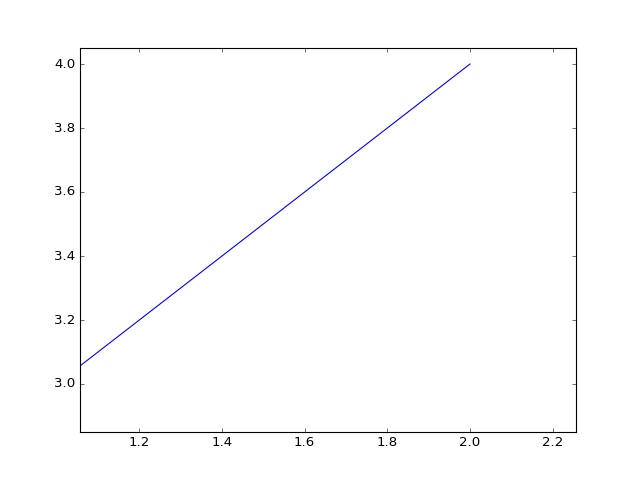

In [6]:
# import matplotlib.pylab as plt
# plt.plot([1,2], [3,4])

In [7]:
import ipykernel

In [8]:
ipykernel.version_info

(4, 5, 0)